# Inicio

- Configuramos para utilizar drive como disco montable
- Luego descomprimimos el archivo de datos

Esto permite acceder a los archivos de drive.
Solo deberían ejecutarlo en caso que estén utilizando colab


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Esto permite cambiar la ubicación de los archivos.
Agregar la [carpeta](https://drive.google.com/open?id=1bGhLt3OUhMz5ks9dBpdUi_ccsXzecx_2) en una carpeta dentro de drive
Ej: Colab Notebooks/BI-2019/

In [2]:
# @title Donde está ubicado el zip?
localizacion_zip = "./drive/MyDrive/Estudios/Facultad Informa\u0301tica/bi-cursada/EDA/" # @param {type:"string"}
import os

os.chdir(localizacion_zip)

In [3]:
# chequeamos si el archivo de datos existe
os.path.isfile('data.zip')

True

In [4]:
# crea la carpeta data con los datos, luego hay que eliminarla
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Pandas essentials

- Pandas es una librería para manipulación de dataframes, una estructura semejante a una grilla de excel.
- Esto es una introducción a su utilización
- Puede ser utilizada para el trabajo final para limpieza y transformación de datos.

Flujo:
- cargar un dataset en formato csv
-

Referencias:
- https://pandas.pydata.org/docs/user_guide/10min.html
- https://www.juanbarrios.com/curso-de-pandas-completo-desde-cero/

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

una **serie** un tipo de Arreglo que te permite almacenar información de diversa tipología

In [6]:
# creamos una serie en pandas
s = pd.Series(np.random.randint(100, size=10))
s

0    92
1    14
2    84
3    78
4    81
5     8
6    29
7    14
8    60
9    82
dtype: int64

Todos los dataframes están compuestos por series, por lo que hay que tener en cuenta esta distinción a la hora de hacer operaciones.

Cargamos un archivo "wine.csv" que contiene información sobre vinos y sus distintas características.

In [40]:
# podemos leer de un csv y de otros formatos simplemente: parquet, excel...
df_wine = pd.read_csv('data/wine.csv')

df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [41]:
# filtramos por la columna alcohol, y seleccionamos 5 observaciones al azar
df_wine.loc[:,["alcohol"]].sample(5)

,alcohol
137,12.53
163,12.96
22,13.71
145,13.16
154,12.58


Los dataframes están basados en indices, y es posible seleccionar columnas y obtener resultados similar a SQL.
Operaciones interesantes en este punto:
- head
- tail
- sample
- loc
- selección por columna (serie o dataframe)


---


También pandas tiene soporte para obtener estadísticas generales de un determinado dataset.
Las operaciones son las presentadas en estadística descriptiva, mencionada en la presentación: cuartiles, media, min, max, desviación estándar.

La operación T permite obtener la traspuesta de dataframe

In [14]:
# podemos observar estadísticas generales
df_wine.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [15]:
# podemos crear un dataframe a partir de un diccionario
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9],
    'label': [np.nan, 3, 1, None, 6],
    'index':['a','b','c','d','e']
}

d = pd.DataFrame(data).set_index('index')
d

,state,year,pop,label
index,,,,
a,Ohio,2000,1.5,NaN
b,Ohio,2001,1.7,3.0
c,Ohio,2002,3.6,1.0
d,Nevada,2001,2.4,NaN
e,Nevada,2002,2.9,6.0


En pandas hay distintas maneras de realizar filtros, pero todas se basan en las operaciones vectoriales y de broadcasting de numpy.

Como programadores estamos acostumbrados que las listas tienen que iterarse para obtener su información y tomar una decisión. En cambio en pandas, estas operaciones permiten crear filtros sin tener que realizar la iteración.

EJEMPLO

In [17]:
# podemos filtrar de muchas maneras gracias a las operaciones vectoriales de numpy
# va a retornar una lista de "T/F" y eso utilizarlo para realizar los filtros
~(d.state == 'Ohio')

index
a    False
b    False
c    False
d     True
e     True
Name: state, dtype: bool

In [18]:
d[d.state =='Ohio']

,state,year,pop,label
index,,,,
a,Ohio,2000,1.5,NaN
b,Ohio,2001,1.7,3.0
c,Ohio,2002,3.6,1.0


In [ ]:
d[~(d.state =='Ohio')]

,state,year,pop,label
index,,,,
d,Nevada,2001,2.4,NaN
e,Nevada,2002,2.9,6.0


los operador "or" y "and" en python son con las instrucciones "`or`" y "`and`". Pero en pandas no, se utilizan `|` y `&`

In [19]:
d[~(d.state=='Ohio') & (d.year == 2001)]

,state,year,pop,label
index,,,,
d,Nevada,2001,2.4,NaN


Nótese que al usar `loc` las condiciones van a la izquierda de la coma (,) y la lista de columnas a la derecha.  
Si ponemos dos puntos (:) a la izquierda de la coma obtendremos todas las filas y a la derecha de la coma todas las columnas.   

In [20]:
d.loc['a':'c', 'year':'label']

,year,pop,label
index,,,
a,2000,1.5,NaN
b,2001,1.7,3.0
c,2002,3.6,1.0


In [21]:
d.loc[['a', 'c'], ['year', 'label']]

,year,label
index,,
a,2000,NaN
c,2002,1.0


`iloc`: index loc. Nos permite buscar por indice.
Notar que al buscar por index no selecciona el "end", y en `loc` si lo hace

SE DESANCOSEJA utilizar iloc

In [ ]:
d.iloc[0:2]

,state,year,pop,label
index,,,,
a,Ohio,2000,1.5,NaN
b,Ohio,2001,1.7,3.0


In [ ]:
d.iloc[[0,2], :]

,state,year,pop,label
index,,,,
a,Ohio,2000,1.5,NaN
c,Ohio,2002,3.6,1.0


## Group by
Al aplicar un groupby() sobre un dataframe obtenemos un GroupBy object que funciona como un diccionario. Al igual que en SQL, hay que realizar operaciones de agregación sobre los grupos.

El resultado de una agregación puede ser un Series o un Data Frame.

Referencia: https://pandas.pydata.org/docs/dev/user_guide/groupby.html

In [33]:
d

,state,year,pop,label
index,,,,
a,Ohio,2000,1.5,NaN
b,Ohio,2001,1.7,3.0
c,Ohio,2002,3.6,1.0
d,Nevada,2001,2.4,NaN
e,Nevada,2002,2.9,6.0


In [22]:
d.groupby('state').size()

state
Nevada    2
Ohio      3
dtype: int64

In [25]:
d.groupby('state').count() # OJO, count tiene en cuenta los NaN

,year,pop,label
state,,,
Nevada,2,2,1
Ohio,3,3,2


In [26]:
# en formato serie podríamos hacer esto
d.state.value_counts()

Ohio      3
Nevada    2
Name: state, dtype: int64

In [28]:
# aquí se está aplicando un group by por state, y para la columna pop de cada grupo se obtiene la media y la desviación
d.groupby(d.state)['pop'].apply(lambda s: [s.mean(), s.std()])

state
Nevada                 [2.65, 0.3535533905932738]
Ohio      [2.266666666666667, 1.1590225767142475]
Name: pop, dtype: object

In [29]:
for g in d.groupby(d.state)['pop']:
    print(g)

('Nevada', index
d    2.4
e    2.9
Name: pop, dtype: float64)
('Ohio', index
a    1.5
b    1.7
c    3.6
Name: pop, dtype: float64)


In [32]:
d.groupby('state').groups # devuelve los indices por cada grupo

{'Nevada': ['d', 'e'], 'Ohio': ['a', 'b', 'c']}

In [34]:
d.groupby('state').get_group('Nevada') # filtramos por un determinado grupo

,state,year,pop,label
index,,,,
d,Nevada,2001,2.4,NaN
e,Nevada,2002,2.9,6.0


In [39]:
d.groupby('state').agg([np.mean, np.max, np.min, np.count_nonzero, np.sum]).T # es posible hacer agregaciones y conseguir un resultado similar al describe

state                 Nevada         Ohio
year  mean           2001.50  2001.000000
      amax           2002.00  2002.000000
      amin           2001.00  2000.000000
      count_nonzero     2.00     3.000000
      sum            4003.00  6003.000000
pop   mean              2.65     2.266667
      amax              2.90     3.600000
      amin              2.40     1.500000
      count_nonzero     2.00     3.000000
      sum               5.30     6.800000
label mean              6.00     2.000000
      amax              6.00     3.000000
      amin              6.00     1.000000
      count_nonzero     2.00     3.000000
      sum               6.00     4.000000

## Manipulation & merging

Concat nos permite combinar dos o más dataframes a lo largo de un eje (filas axis = 0, columnas axis = 1) con la opción de hacer unión o intersección en función del index.

Por defecto concatena los dataframes uno debajo de otro (axis = 0).

Append, que vendría a ser un caso especial de concat que sólo hace union por el eje “0” (filas).

- concat: concatena por medio de un axis (defecto axis=0) (append)
- merge: concatena por medio de columnas (similar a SQL)
- join: usa internamente merge
- merge_ordered
- merge_asof
- compare

Referencia: https://pandas.pydata.org/docs/dev/user_guide/merging.html
https://studymachinelearning.com/difference-between-merge-join-and-concatenate/

In [46]:
d2 = d.copy() # creamos una copia de nuestro dataframe
d2.index = ['e', 'f', 'g', 'h', 'i'] # cambiamos el índice, solo dejamos compartiendo el índice 'e'
d2

,state,year,pop,label
e,Ohio,2000,1.5,NaN
f,Ohio,2001,1.7,3.0
g,Ohio,2002,3.6,1.0
h,Nevada,2001,2.4,NaN
i,Nevada,2002,2.9,6.0


In [47]:
d

,state,year,pop,label
index,,,,
a,Ohio,2000,1.5,NaN
b,Ohio,2001,1.7,3.0
c,Ohio,2002,3.6,1.0
d,Nevada,2001,2.4,NaN
e,Nevada,2002,2.9,6.0


In [43]:
pd.concat([d, d2]) # es como un append de arreglos, ojo porque un índice

,state,year,pop,label
a,Ohio,2000,1.5,NaN
b,Ohio,2001,1.7,3.0
c,Ohio,2002,3.6,1.0
d,Nevada,2001,2.4,NaN
e,Nevada,2002,2.9,6.0
e,Ohio,2000,1.5,NaN
f,Ohio,2001,1.7,3.0
g,Ohio,2002,3.6,1.0
h,Nevada,2001,2.4,NaN
i,Nevada,2002,2.9,6.0


In [ ]:
# join por index.
pd.concat([d, d2], axis = 1, sort=False)

,state,year,pop,label,state,year,pop,label
a,Ohio,2000.0,1.5,NaN,NaN,NaN,NaN,NaN
b,Ohio,2001.0,1.7,3.0,NaN,NaN,NaN,NaN
c,Ohio,2002.0,3.6,1.0,NaN,NaN,NaN,NaN
d,Nevada,2001.0,2.4,NaN,NaN,NaN,NaN,NaN
e,Nevada,2002.0,2.9,6.0,Ohio,2000.0,1.5,NaN
f,NaN,NaN,NaN,NaN,Ohio,2001.0,1.7,3.0
g,NaN,NaN,NaN,NaN,Ohio,2002.0,3.6,1.0
h,NaN,NaN,NaN,NaN,Nevada,2001.0,2.4,NaN
i,NaN,NaN,NaN,NaN,Nevada,2002.0,2.9,6.0


In [ ]:
pd.concat([d, d2], axis = 1, sort=False, join='inner')

,state,year,pop,label,state,year,pop,label
e,Nevada,2002,2.9,6.0,Ohio,2000,1.5,NaN


Para combinar dos tablas podemos usar merge o join.  
El primero permite hacer `inner, left, right y outer join` usando una o más columnas.  

El segundo usa el index por defecto (internamente usa merge).  

La diferencia con concat es este trabaja sobre indices (axis), mientras que merge y join con columnas.

In [ ]:
# si no le indicamos hace por todas las columnas que tengan el mismo nombre
pd.merge(d,d2)

,state,year,pop,label
0,Ohio,2000,1.5,NaN
1,Ohio,2001,1.7,3.0
2,Ohio,2002,3.6,1.0
3,Nevada,2001,2.4,NaN
4,Nevada,2002,2.9,6.0


In [ ]:
pd.merge(d, d2, right_on='year', left_on='year', how='outer') # si las columnas se repiten, se agrega un suffix o prefix

,state_x,year,pop_x,label_x,state_y,pop_y,label_y
0,Ohio,2000,1.5,NaN,Ohio,1.5,NaN
1,Ohio,2001,1.7,3.0,Ohio,1.7,3.0
2,Ohio,2001,1.7,3.0,Nevada,2.4,NaN
3,Nevada,2001,2.4,NaN,Ohio,1.7,3.0
4,Nevada,2001,2.4,NaN,Nevada,2.4,NaN
5,Ohio,2002,3.6,1.0,Ohio,3.6,1.0
6,Ohio,2002,3.6,1.0,Nevada,2.9,6.0
7,Nevada,2002,2.9,6.0,Ohio,3.6,1.0
8,Nevada,2002,2.9,6.0,Nevada,2.9,6.0


In [50]:
pd.merge(d, d2, right_on='year', left_on='year', how='outer', suffixes=["_left", None])

,state_left,year,pop_left,label_left,state,pop,label
0,Ohio,2000,1.5,NaN,Ohio,1.5,NaN
1,Ohio,2001,1.7,3.0,Ohio,1.7,3.0
2,Ohio,2001,1.7,3.0,Nevada,2.4,NaN
3,Nevada,2001,2.4,NaN,Ohio,1.7,3.0
4,Nevada,2001,2.4,NaN,Nevada,2.4,NaN
5,Ohio,2002,3.6,1.0,Ohio,3.6,1.0
6,Ohio,2002,3.6,1.0,Nevada,2.9,6.0
7,Nevada,2002,2.9,6.0,Ohio,3.6,1.0
8,Nevada,2002,2.9,6.0,Nevada,2.9,6.0


In [54]:
pd.merge(d, d2, right_on='pop', left_on='label', how='left', suffixes=["_left", None]) # si no encuentra, deja la fila con NaN por el left join

,state_left,year_left,pop_left,label_left,state,year,pop,label
0,Ohio,2000,1.5,NaN,NaN,NaN,NaN,NaN
1,Ohio,2001,1.7,3.0,NaN,NaN,NaN,NaN
2,Ohio,2002,3.6,1.0,NaN,NaN,NaN,NaN
3,Nevada,2001,2.4,NaN,NaN,NaN,NaN,NaN
4,Nevada,2002,2.9,6.0,NaN,NaN,NaN,NaN


merge_ordered: permite combinar dos dataframes ordenados
merge_asof: permite ordenar dos dataframes por "cercanías" de ciertos valores (por ejemplo, tiempo).
compare: permite comparar dos dataframes y visualizar las diferencias

In [55]:
# d.join(d2, how='outer', lsuffix="_x") # obliga a colocar un sufijo

In [ ]:
# todas las operaciones son idempotentes (o side-effects), no modifican al objeto (salvo aclaración)
d

## Reestructurar

Operaciones importantes:
- pivot
- melt
- stack

otras:
- crosstab
- explode

In [69]:
import itertools
import random

alumnos = [f"Alumno_{i}" for i in range(0,10)]
materias = [f"Materia_{i}" for i in range(0,10)]

comb = list(itertools.product(alumnos, materias))
comb = comb + comb
notas = [ (a,m,random.randint(0,10)) for a, m in comb]


In [70]:
notas = pd.DataFrame(notas, columns=["Alumno", "Materia", "Nota"])

In [71]:
notas

,Alumno,Materia,Nota
0,Alumno_0,Materia_0,10
1,Alumno_0,Materia_1,5
2,Alumno_0,Materia_2,10
3,Alumno_0,Materia_3,2
4,Alumno_0,Materia_4,5
...,...,...,...
195,Alumno_9,Materia_5,8
196,Alumno_9,Materia_6,7
197,Alumno_9,Materia_7,3
198,Alumno_9,Materia_8,5


El anterior dataframe está compuesto por las observaciones de las notas de cada alumno, para una determinada materia. A nivel estructura es la más acertada, sobretodo para almacenarla en una base de datos.

Pero esa estructura no sirve para visualizar información, sino que son todas observaciones, para ello podemos reestructurar el dataframe y obtener información

In [74]:
# pivot solo soporta 1 observación por fila, si hay más de 1 observación
# en este caso tenemos 2 notas para la misma materia por alumno, va a fallar
try:
  notas.pivot(index='Alumno', columns='Materia', values='Nota')
except ValueError as e:
  print(e)

Index contains duplicate entries, cannot reshape


In [76]:
# para esos casos hay que utilizar pivot_table
# devolvemos para cada alumno, en cada materia, el promedio
notas.pivot_table(index='Alumno', columns='Materia', values='Nota', aggfunc=["mean"])

mean                                                    \
Materia  Materia_0 Materia_1 Materia_2 Materia_3 Materia_4 Materia_5   
Alumno                                                                 
Alumno_0       5.0       5.0       7.0       1.0       7.5       1.5   
Alumno_1       2.5       6.5       5.0       6.0       5.0       4.0   
Alumno_2       2.0       6.0      10.0       2.5       6.5       1.5   
Alumno_3       5.5       2.5       3.5       6.0       6.0       8.0   
Alumno_4       5.0      10.0       4.5       4.0       2.0       8.0   
Alumno_5       7.0       6.0       7.5       8.5       9.5       3.5   
Alumno_6       6.5       2.5       7.0       2.5       6.0       8.0   
Alumno_7       5.0       6.0       6.5       7.0       3.5       2.5   
Alumno_8       8.0       1.5       5.0       2.0       5.0       6.5   
Alumno_9       4.5       5.0       5.5       7.0       6.5       7.5   

                                                  
Materia  Materia_6 Materia_7 Materia_8 Materia_9  
Alumno                                            
Alumno_0       5.0       5.5       3.5       8.0  
Alumno_1       4.0       1.5       4.5       8.0  
Alumno_2       4.0       5.0       4.0       5.5  
Alumno_3       8.0       2.5       0.5       3.5  
Alumno_4       2.5       7.0       6.0       4.0  
Alumno_5       5.5       1.5       2.0       1.5  
Alumno_6      10.0       6.0       3.0       1.0  
Alumno_7       8.0       9.5       7.5       7.5  
Alumno_8       2.0       1.5       2.0       5.0  
Alumno_9       5.0       6.5       6.5       3.5

Con pivot_table podemos rotar un dataframe indicando las columnas que pasarán a ser nuestro index y hacer agregaciones sobre las otras columnas.
Podemos pasar una lista de funciones a aggfunc.


In [112]:
notas.pivot_table(index='Alumno', columns='Materia', values='Nota', aggfunc=["mean"]).droplevel(0, axis=1)

Materia,Materia_0,Materia_1,Materia_2,Materia_3,Materia_4,Materia_5,Materia_6,Materia_7,Materia_8,Materia_9
Alumno,,,,,,,,,,
Alumno_0,5.0,5.0,7.0,1.0,7.5,1.5,5.0,5.5,3.5,8.0
Alumno_1,2.5,6.5,5.0,6.0,5.0,4.0,4.0,1.5,4.5,8.0
Alumno_2,2.0,6.0,10.0,2.5,6.5,1.5,4.0,5.0,4.0,5.5
Alumno_3,5.5,2.5,3.5,6.0,6.0,8.0,8.0,2.5,0.5,3.5
Alumno_4,5.0,10.0,4.5,4.0,2.0,8.0,2.5,7.0,6.0,4.0
Alumno_5,7.0,6.0,7.5,8.5,9.5,3.5,5.5,1.5,2.0,1.5
Alumno_6,6.5,2.5,7.0,2.5,6.0,8.0,10.0,6.0,3.0,1.0
Alumno_7,5.0,6.0,6.5,7.0,3.5,2.5,8.0,9.5,7.5,7.5
Alumno_8,8.0,1.5,5.0,2.0,5.0,6.5,2.0,1.5,2.0,5.0


In [115]:
# para volver se utiliza melt
(
    notas.pivot_table(index='Alumno', columns='Materia', values='Nota', aggfunc=["mean"])
    .droplevel(0, axis=1)
    .reset_index()
    .melt(id_vars='Alumno', value_name='Promedio')
)

,Alumno,Materia,Promedio
0,Alumno_0,Materia_0,5.0
1,Alumno_1,Materia_0,2.5
2,Alumno_2,Materia_0,2.0
3,Alumno_3,Materia_0,5.5
4,Alumno_4,Materia_0,5.0
...,...,...,...
95,Alumno_5,Materia_9,1.5
96,Alumno_6,Materia_9,1.0
97,Alumno_7,Materia_9,7.5
98,Alumno_8,Materia_9,5.0


# Visualizaciones

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [140]:
# esto permite cambiar el template de las visualizaciones.
plt.style.use('ggplot')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [142]:
plt.rc('figure', figsize=(20,10))


In [143]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [144]:
flights = pd.read_csv('./data/flights.csv')
flights

,Grupo,Asientos (2004),Asientos (1999) a escala
0,EUL,39,49
1,PES,200,210
2,EFA,42,56
3,EDD,15,19
4,ELDR,67,60
5,EPP,276,272
6,UEN,27,36
7,Otros,66,29


## Gráficos de barra
Una de las variables debe ser categórica.  
Ambos ejes deben comenzar en cero.   
Cuando se tiene más de una variable categórica se pueden usar barras apiladas o contiguas.  


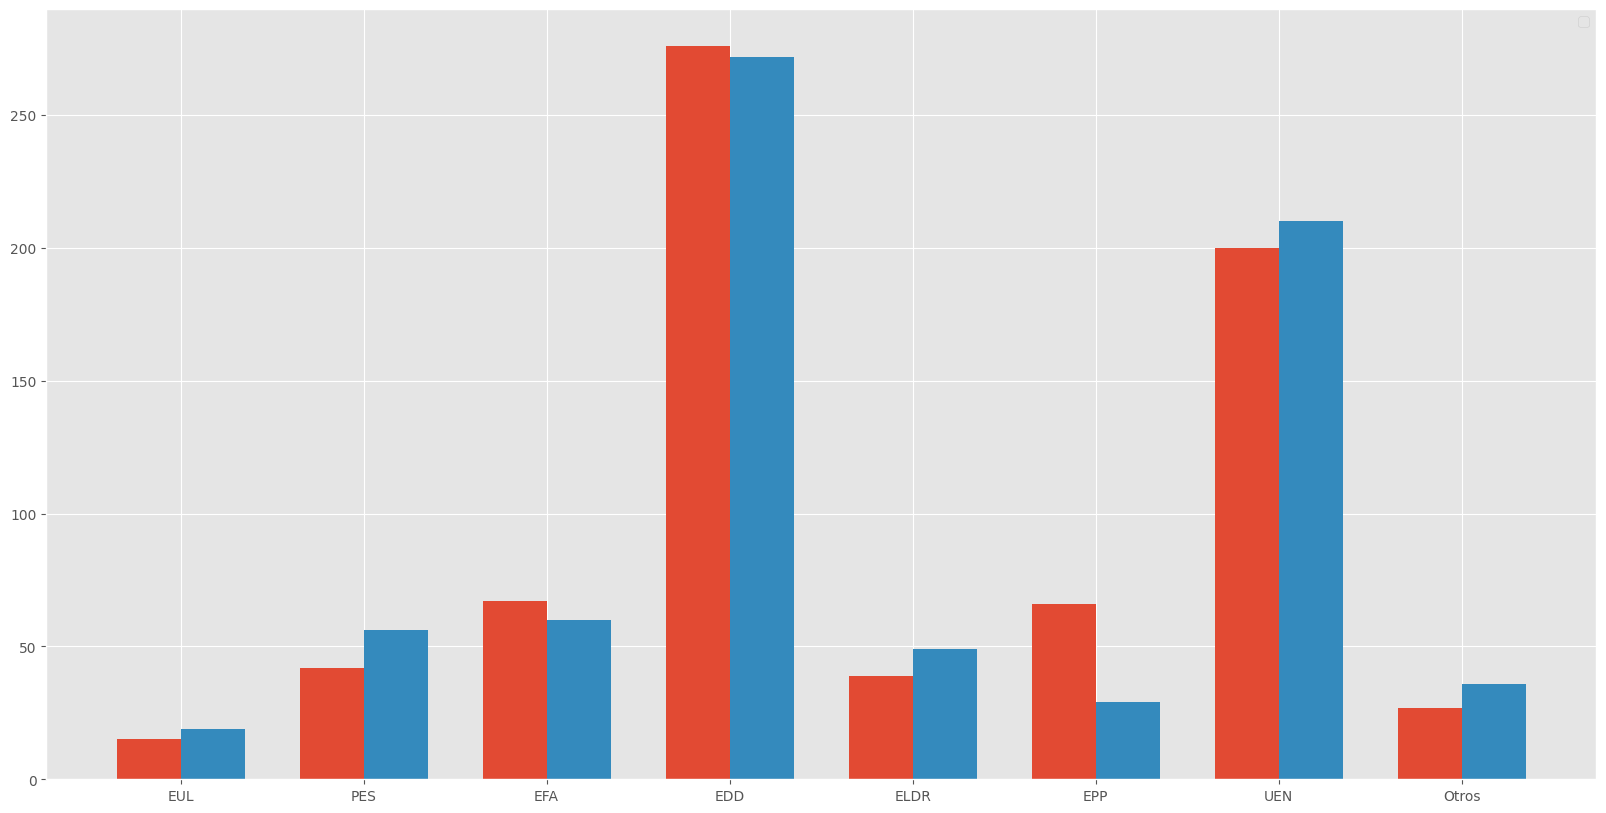

In [145]:
groups = flights.groupby(['Grupo']).sum()

y_pos = np.arange(len(groups))
width = 0.35  # the width of the bars

plt.bar(y_pos - width/2, groups['Asientos (2004)'], align='center', width=width)
plt.bar(y_pos + width/2 , groups['Asientos (1999) a escala'], align='center', width=width)
plt.xticks(y_pos, labels=flights['Grupo'])
plt.legend()

<Axes: xlabel='Grupo'>

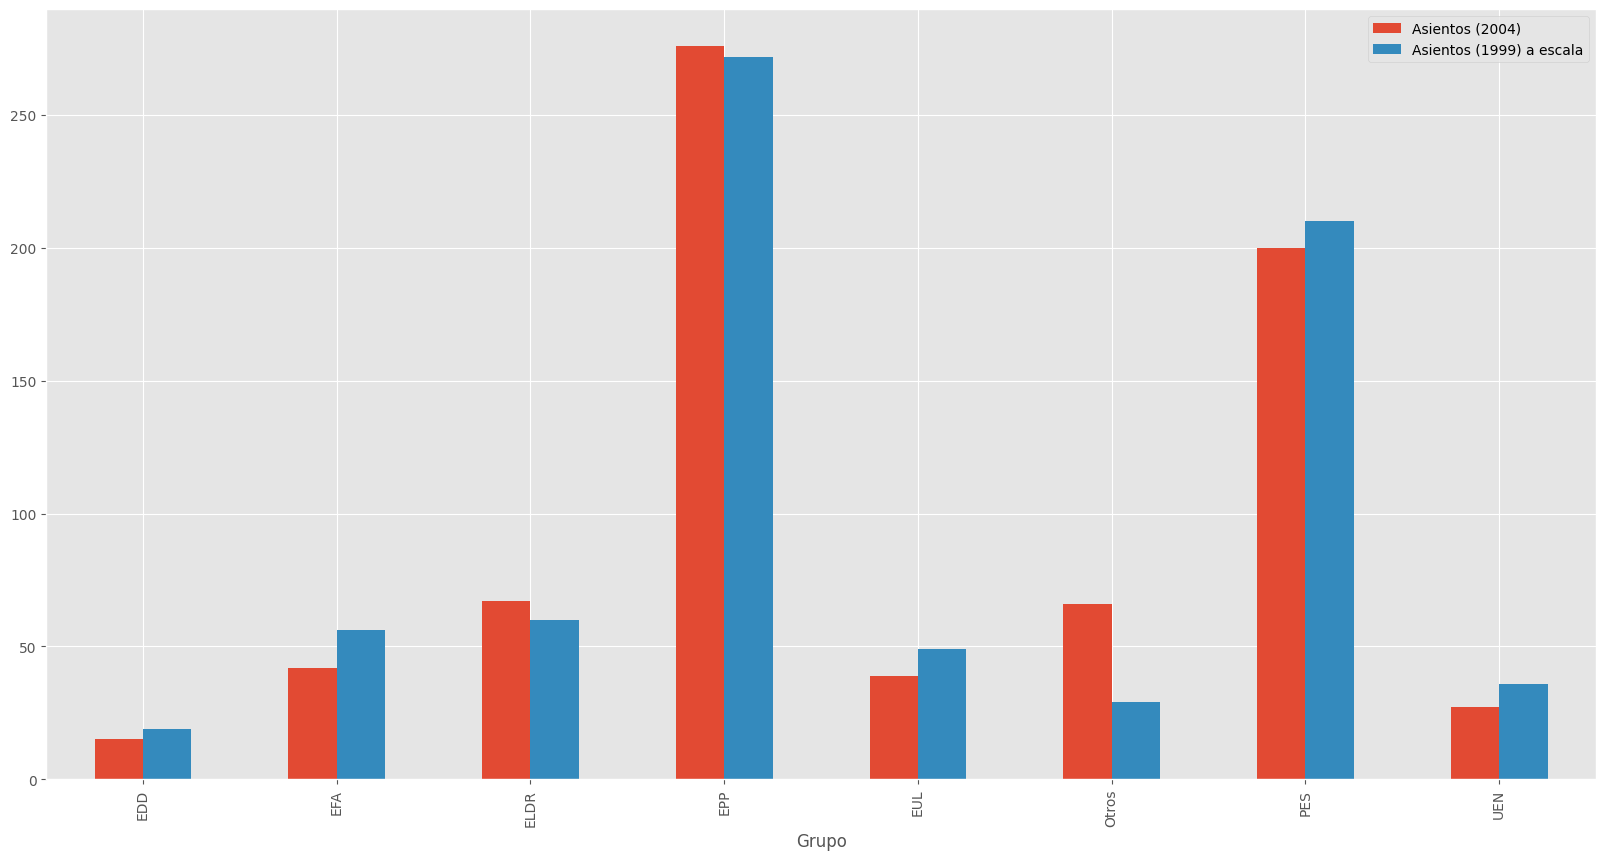

In [146]:
flights.groupby(['Grupo']).sum().plot.bar()

<Axes: xlabel='Grupo', ylabel='value'>

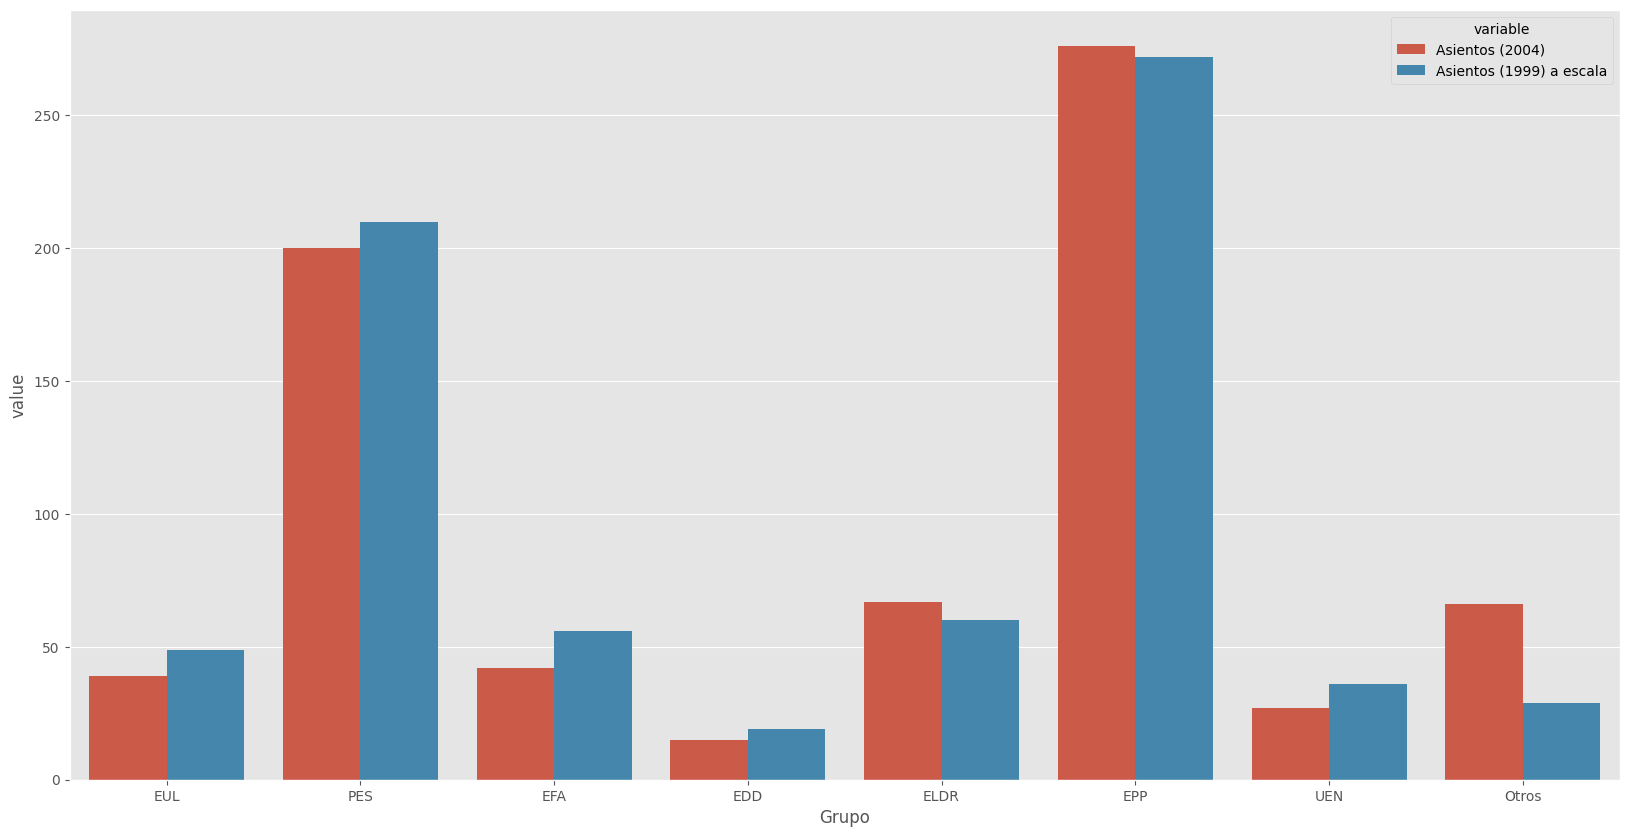

In [147]:
sns.barplot(x='Grupo', y='value', hue='variable', data=flights.melt(id_vars="Grupo"))
# https://stackoverflow.com/questions/40877135/plotting-two-columns-of-dataframe-in-seaborn

## Histogramas
Sirven para mostrar la `distribución` de una determinada variable, es decir, la cantidad de veces que la variable toma determinados valores.  
El eje x siempre es numérico.  
No hay espacios entre las barras.  
El eje y siempre representa una cantidad.  
Es importante determinar el tamaño y la cantidad de los intervalos (bins).  
  


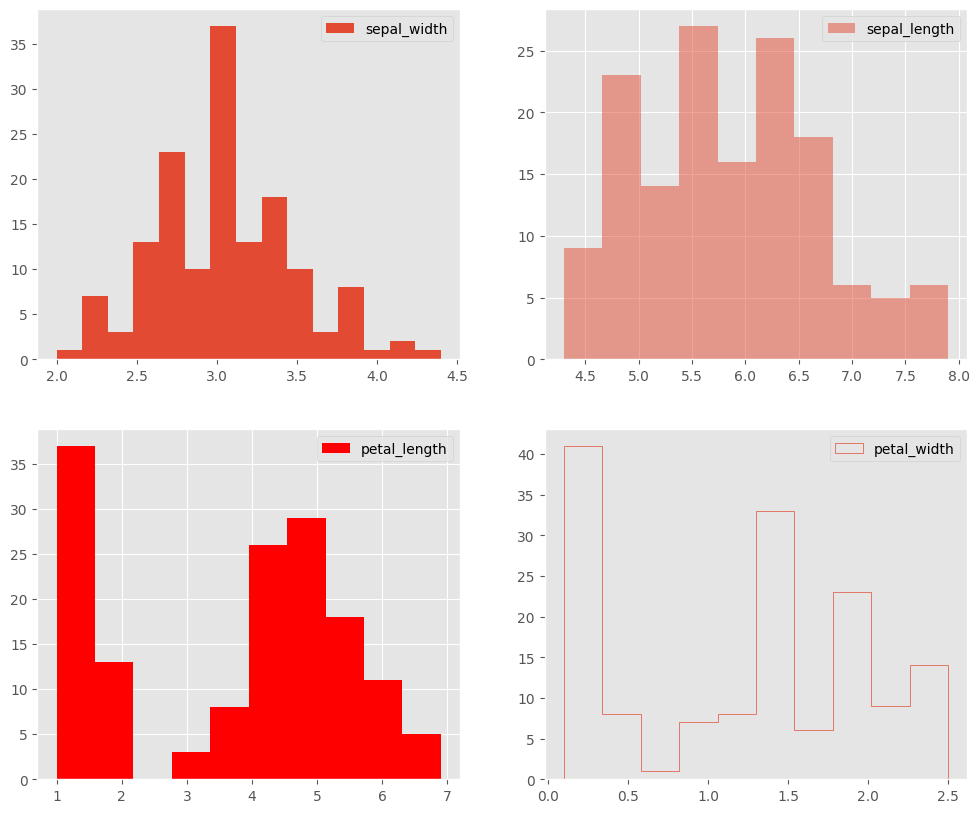

In [148]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes[0,0].hist(iris.sepal_width, bins=15, label='sepal_width')
axes[0,0].legend()
axes[0,0].grid()

axes[0,1].hist(iris.sepal_length, alpha=0.5, label='sepal_length', histtype='stepfilled')
axes[0,1].legend()


axes[1,0].hist(iris.petal_length, color='red',label='petal_length')
axes[1,0].legend()


axes[1,1].hist(iris.petal_width, histtype='step',label='petal_width')
axes[1,1].legend()
plt.grid()
plt.show()

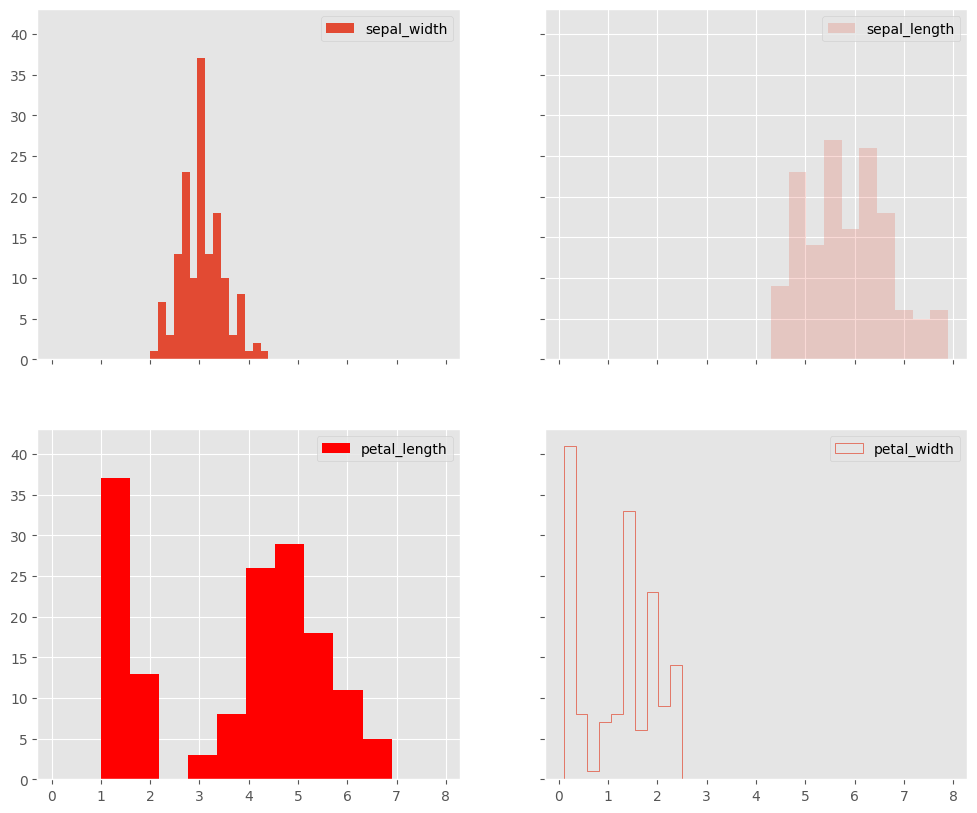

In [149]:
# si queremos hacer un gráfico engañoso, pondríamos otras escalas en el eje Y incluso. (así parece más grande de lo que es)
fig, axes = plt.subplots(2,2, figsize=(12,10), sharey=True, sharex=True)

axes[0,0].hist(iris.sepal_width, bins=15, label='sepal_width')
axes[0,0].legend()
axes[0,0].grid()

axes[0,1].hist(iris.sepal_length, alpha=0.2, label='sepal_length', histtype='stepfilled')
axes[0,1].legend()

axes[1,0].hist(iris.petal_length, color='red',label='petal_length')
axes[1,0].legend()

axes[1,1].hist(iris.petal_width, histtype='step',label='petal_width')
axes[1,1].legend()
axes[1,1].grid()

plt.show()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

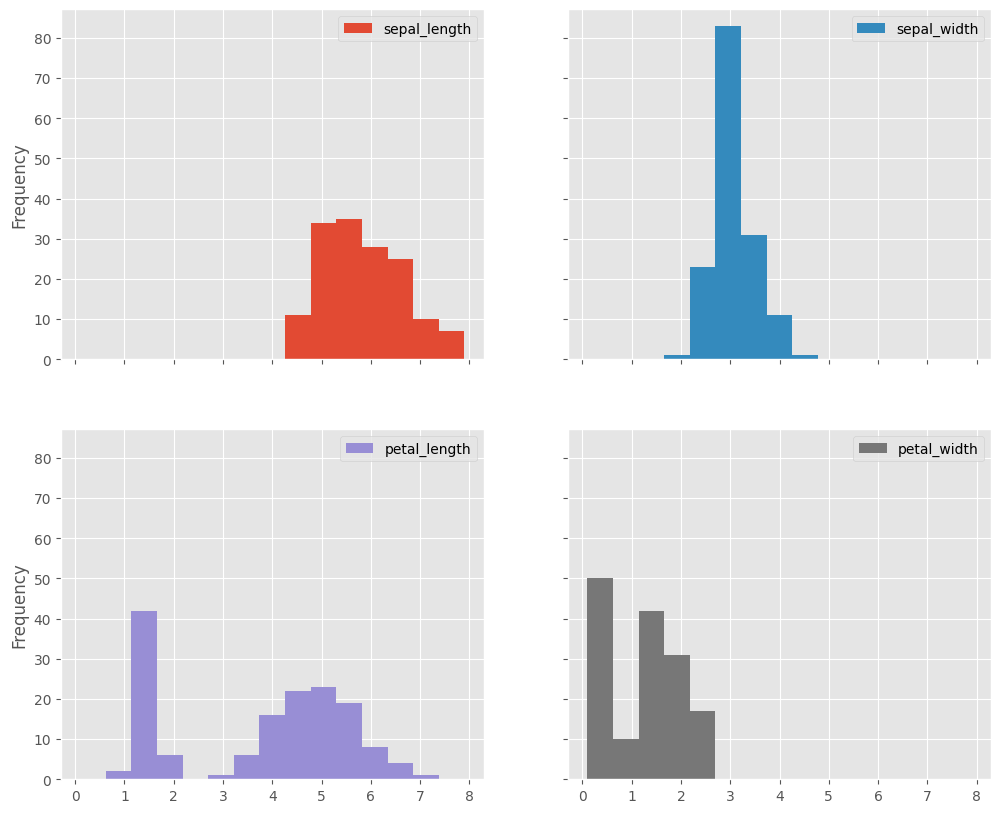

In [150]:
fig, axes = plt.subplots(2,2, figsize=(12,10), sharey=True, sharex=True)
iris.plot.hist(subplots=True, ax=axes, bins=15)

<Axes: xlabel='petal_length', ylabel='Density'>

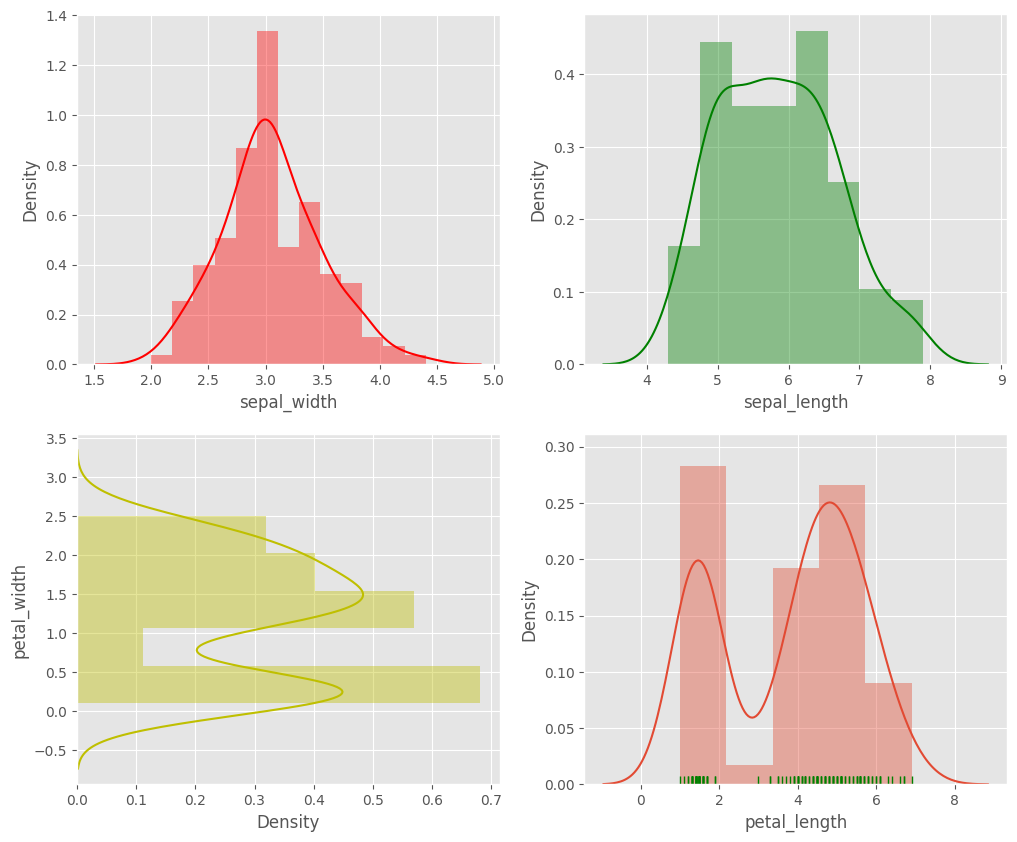

In [151]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

sns.distplot(iris.sepal_width, ax=axes[0,0], color="red")

sns.distplot(iris.sepal_length, ax=axes[0,1], color='g')

sns.distplot(iris.petal_width, ax=axes[1,0], vertical=True, color='y')

sns.distplot(iris.petal_length, ax=axes[1,1], rug=True, rug_kws={"color": "g"})

## Scatter plots
Ambas variables X e Y deben ser numéricas.  
Sirve para dar una idea de la dependencia que existe entre las variables y de sus características.  
Se le puede agregar dimensiones controlando el color de los puntos.  

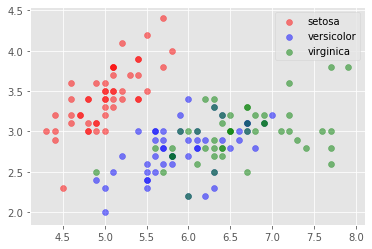

In [ ]:

colours = ['red',  'blue', 'green']
species = iris.species.unique()

for i in range(0, 3):
    df = iris[iris.species == species[i] ]

    plt.scatter(
        df.sepal_length,
        df.sepal_width,
        color=colours[i],
        alpha=0.5,
        label=species[i]
    )

plt.legend()

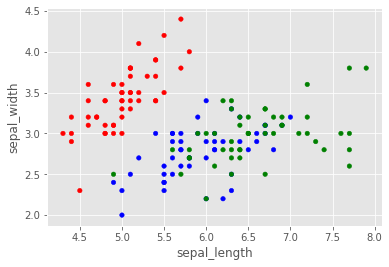

In [ ]:
def color(s):
    if s =='se':
        return 'r'
    if s == 'vi':
        return 'g'
    if s == 've':
        return 'b'

colors = iris.species.apply(lambda s: color(s[0:2]))
iris.plot.scatter(x='sepal_length',y='sepal_width', c=colors)

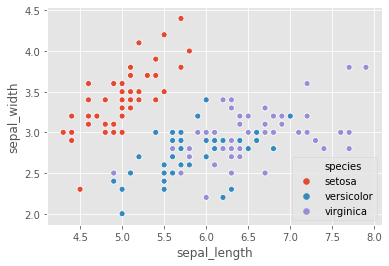

In [ ]:
# aguante seaborn
sns.scatterplot(x='sepal_length', y='sepal_width', hue=iris.species, data=iris)

## Line Plots
Sirve principalmente para representar series temporales.  
El eje X debe representar (casi) siempre el tiempo.   
La variable Y es siempre ordinal. Por lo general es numérica [pero puede ser también categórica]

In [ ]:
# el indice es DateTimeIndex
stocks = pd.read_csv('data/stocks.csv', parse_dates=["Date"]).set_index('Date')
aapl = stocks.AAPL
ibm = stocks.IBM
csco = stocks.CSCO
msft = stocks.MSFT

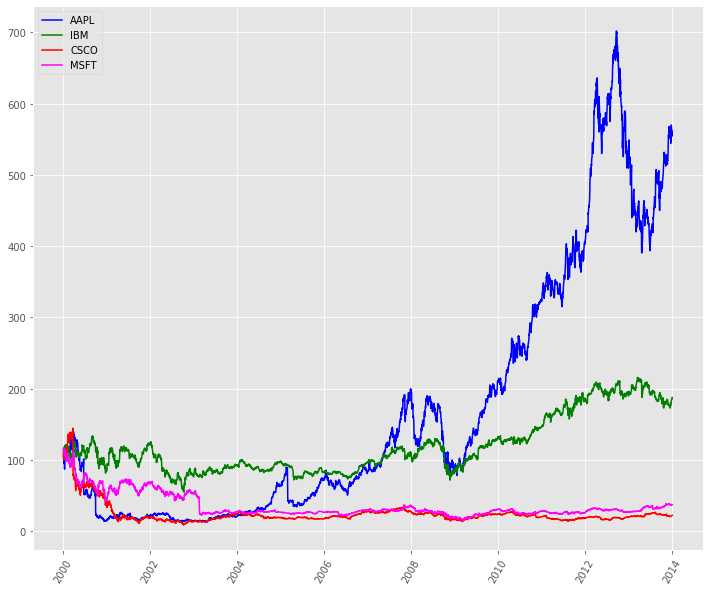

In [ ]:
plt.figure(figsize=(12,10))
# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()

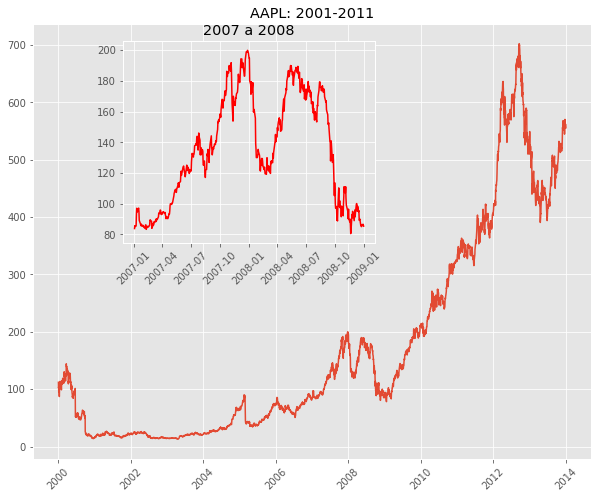

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# subview
view = aapl['2007':'2008']

# Specify the axes
plt.axes([0.25,0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007 a 2008')
plt.show()

In [ ]:
fmri = sns.load_dataset("fmri")
fmri


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


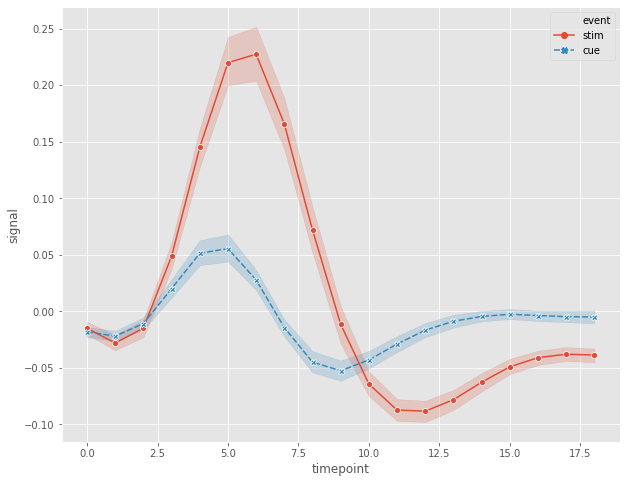

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.lineplot(
    x="timepoint",
    y="signal",
    data=fmri,
    hue="event", # agrega colores
    style="event", # agrega estilo a los puntos
    markers=True, # agrega los puntos
    dashes=True, # agrega lineas punteadas
    ci=68)

## Boxplots
Sirve para visualizar la distribución de una variable numérica.  
Se usa para comparar la distribución de la variable numérica de acuerdo a una variable categórica mostrando varios boxplots uno al lado del otro.  
Cada caja contiene el 50% de los datos y la línea horizontal representa la media.   
Las líneas punteadas que salen hacia arriba y hacia abajo representan los máximos y mínimos respectivamente.  


In [ ]:
plt.figure(figsize=(10,10))
_ = plt.boxplot([iris.sepal_length, iris.sepal_width, iris.petal_length, iris.petal_width])

In [ ]:
iris.plot.box(figsize=(10,10))

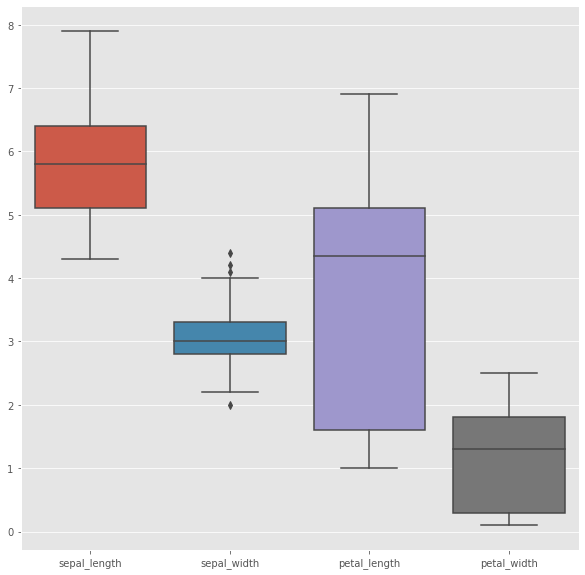

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=iris)

Una solución más moderna a los boxplots son los diagramas de violin. Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.:
    
- el punto blanco representa la mediana
- la barra gris gruesa en el centro representa el rango intercuartil (la caja del boxplot)
- la linea gris fina, representa el intervalo de confianza del 95%
- el color representa la densidad de los datos (gráfico de kde con histograma más arriba)


Este gráfico aglommera todas las visualizaciones

https://datavizcatalogue.com/ES/metodos/diagrama_de_violin.html

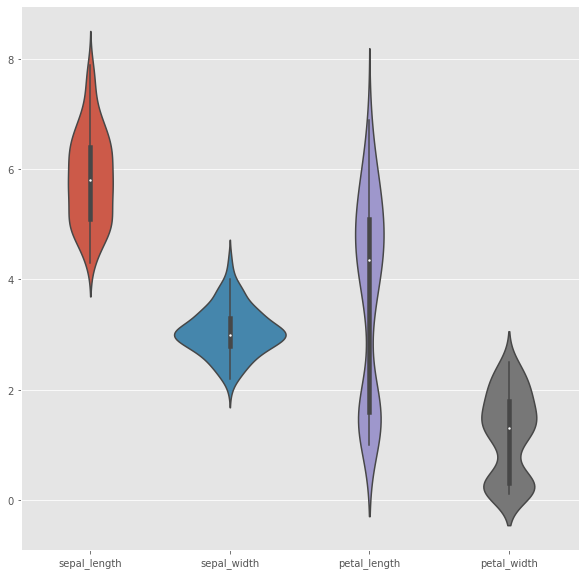

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(data=iris)
# https://mode.com/blog/violin-plot-examples

## Gráfico de torta (pie charts)
Es un recurso que se utiliza para representar porcentajes y proporciones.  
El número de elementos comparados dentro de una gráfica circular suele ser de más de cuatro.


In [ ]:
_ = plt.pie(
    iris.species.value_counts(),
    labels=iris.species.unique(),
    autopct='%1.1f%%', # coloca los porcentajes
    shadow=True,
    startangle=90 # donde coloca los labels
)
plt.legend()

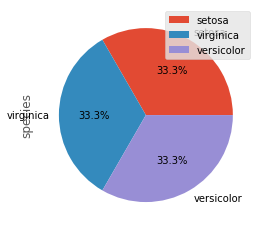

In [ ]:
iris.species.value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()

## Heatmaps

<Axes: xlabel='Task', ylabel='Model'>

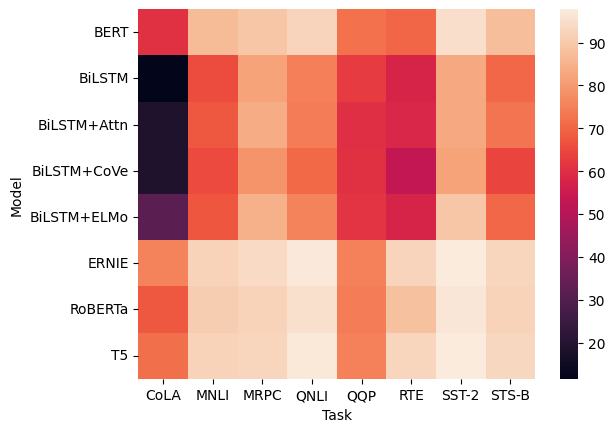

In [138]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)

# Data Preparation
Veremos:
- Exploratory Data Analysis
- Data Transformation



## 1.1.Analisis exploratorio de los datos

Vamos a trabajar con el dataset `adult` de repositorio UCI.
En este apartado, vamos a visualizar nuestro dataset, y luego a modificar nuestra información.  
Como premisa, vamos a intentar "conocer" nuestros datos, saber con que valores tratamos, si hay faltantes, rangos, etc...  
Podríamos seguir la siguiente receta:
- descubrir el tipo de variables: númericas y discretas
- obtener estadísticas generales
- ver correlaciones entre las variables númericas
- ver datos erroneos (" United-States" != "United-States" )
- ver outliers (hours-per-week == 99 ?????)

Tenemos que conocer nuestros datos para que nuestro dataset sea de calidad.

Nota: recordar que estos pasos deben ser "reproducibles". Las notebooks generan un poco de desorden al ejecutar código como en una consola.
Datos: [adult](https://archive.ics.uci.edu/ml/datasets/Adult)

In [ ]:
# Análisis de datos
import pandas as pd
import numpy as np
pd.set_option('display.max.columns', 100)

# Visualización
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

# por default
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('classic')

import warnings
warnings.filterwarnings('ignore')

### 1.1.1 Estadísticas Generales
- Leemos el dataset crudo (raw)

In [ ]:
df = pd.read_csv('data/adult/adult.data', header=None,
                 names=['age','workclass','fnlwgt', \
                        'education','education-num','marital-status', \
                        'occupation','relationship','race', \
                        'sex','capital-gain','capital-loss', \
                        'hours-per-week','native-country','income'
                       ])

In [ ]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
16075,44,Private,187322,Bachelors,13,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
22740,25,Private,240081,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,<=50K
947,36,Self-emp-inc,108293,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1977,45,United-States,>50K
10405,28,Private,109282,Some-college,10,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
21607,25,Private,122075,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,<=50K


______________
- Verificamos los tipos de variables que tenemos

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Varios tipos que estamos viendo, deberían ser "str", pero están como "object"
__________

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Vemos estadísticas generales de todas las columnas.
Al ser tantas, queda un poco engorroso y hay que verificar con mas detenimiento. Las separamos por tipo de columna: númericas y categoricas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
df.describe(include=[np.object]).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [ ]:
# verificamos missing values
df.isna().values.any()

False

Verificamos la correlacción que existe entre las variables númericas.

Variables lineales:   
| x | > 0.8 fuertemente lineal  
| x | > 0.5 debilmente lineal  
| x | < 0.5 no se puede sacar conclusiones  

In [ ]:
# podríamos visualizar todas las columnas
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
# o con este script visualizar las que son lineales
corr_matrix = df.corr().abs()
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper = corr_matrix.where(upper_triangle)

to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

if len(to_drop) == 0:
    print("No hay features linealmente dependientes")
else:
    upper.loc[:, to_drop].dropna().sort_values(by=to_drop, ascending=False)

No hay features linealmente dependientes


In [ ]:
# con pairplot graficamos un scatter por cada variable númerica y a distribución en la diagonal.
# como podemos observar, ninguna se comporta de manera lineal!
# sns.pairplot(data=df, kind='reg')

In [ ]:
# otra forma de ver las correlaciones, es un diagrama de calor, heatmap, matriz con colores (?)
# en este caso, cuanto más obscuro son los datos, más relacionados linealmente se encuentran
# plt.figure(figsize=(7,5))
# sns.heatmap(df.corr(),
#             xticklabels=df.corr().columns.values,
#             yticklabels=df.corr().columns.values,
#             cmap='BuPu')
# plt.title('Correlación de atributos mediante heatmap')
# plt.show()

_________________________________________
### 1.1.2. Variables Categóricas
- Vamos a visualizar la frecuencia de los valores categóricos

In [ ]:
df_object = df.select_dtypes(np.object)

In [ ]:
for c in df_object.columns:
    df_object[c].value_counts().plot.bar()
    plt.title(c)
    plt.figure()

Realizamos un gráfico de torta por cada una de estas variables. (veremos que algunos no se ven correctamente)

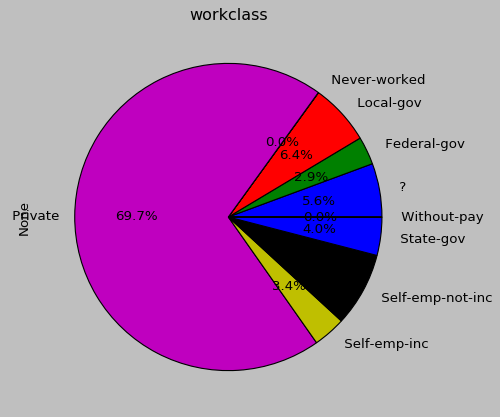

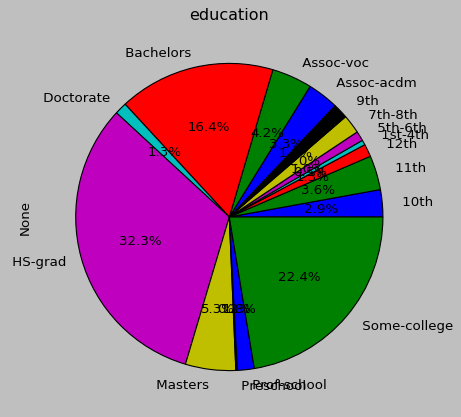

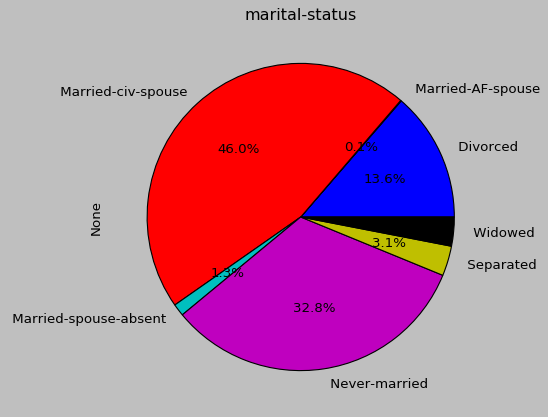

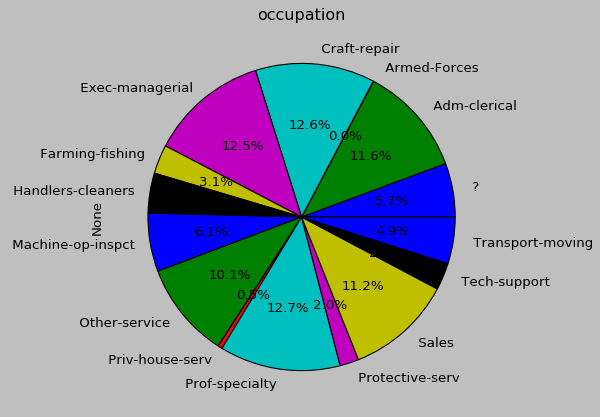

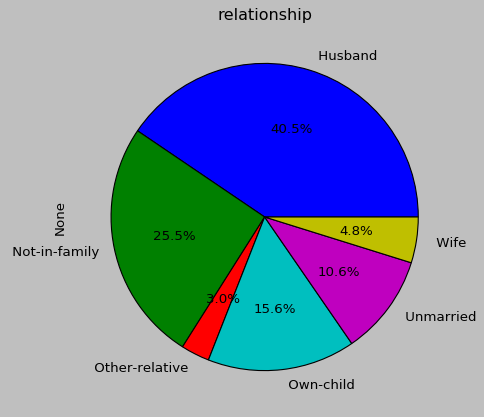

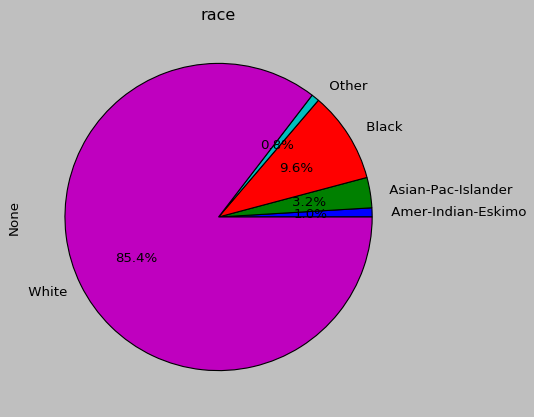

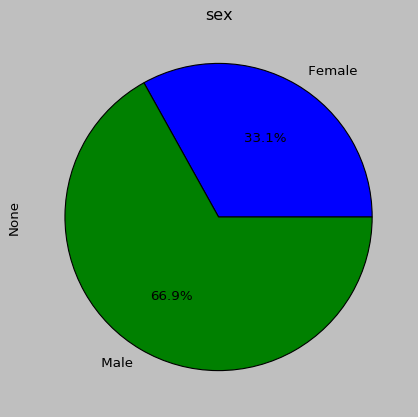

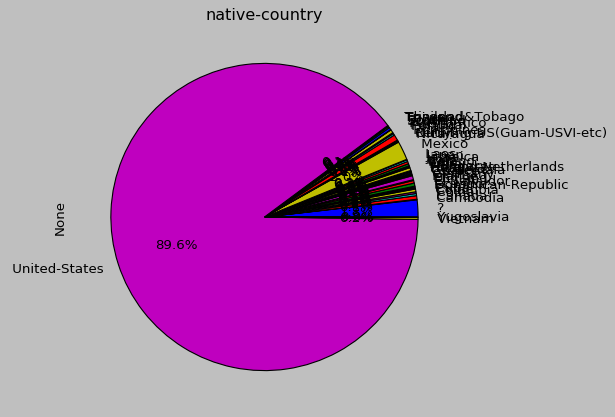

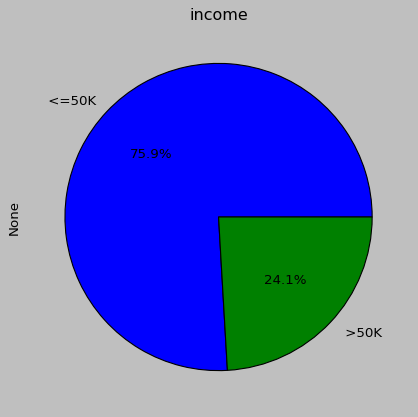

<Figure size 640x480 with 0 Axes>

In [ ]:
for c in df_object:
    df.groupby(c).size().plot.pie(autopct='%1.1f%%')
#     plt.legend()
    plt.title(c)
    plt.figure()

Podemos observar que hay varias features que tienen mucha categorías diferentes (como puede ser native-country o race).
En ellas podríamos agrupar para generar una categoría nueva que los identifique a todos.

Tambien observamos que hay ciertos gráficos, como los de torta, que cuesta más leerlos si hay muchas categorias!  
Aunque otros parecen más interesantes verlos asi (como income, sex...)  
Continuamos el analisis sobre estas variables para ver que "trucos" podemos hacer para visualizar mejor...

_____________

¿Distribución por pais? como vimos en el gráfico de arriba, la mayoría de los datos pertenecen a "united-states".
Podríamos descargar EEUU para visualizar, o agrupar en 2, "EEUU" y "NOT IN EEUU"

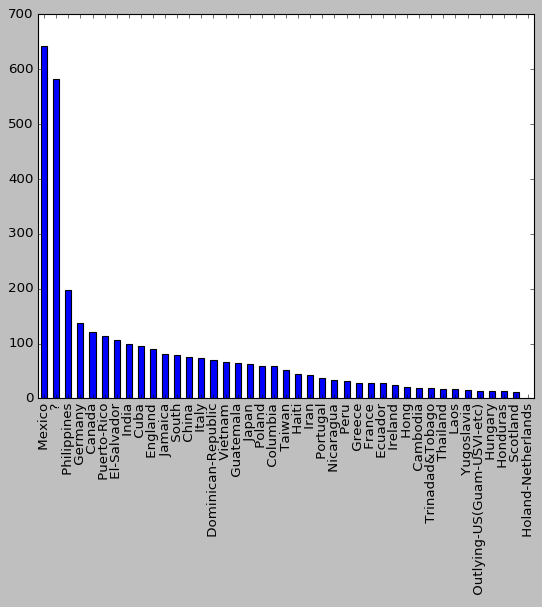

In [ ]:
# si descargamos EEUU:
df.loc[~(df['native-country'].str.contains('United-States')),'native-country'].value_counts().plot.bar()
# Podemos ver que la muestra no es significativa para dividir por native-country

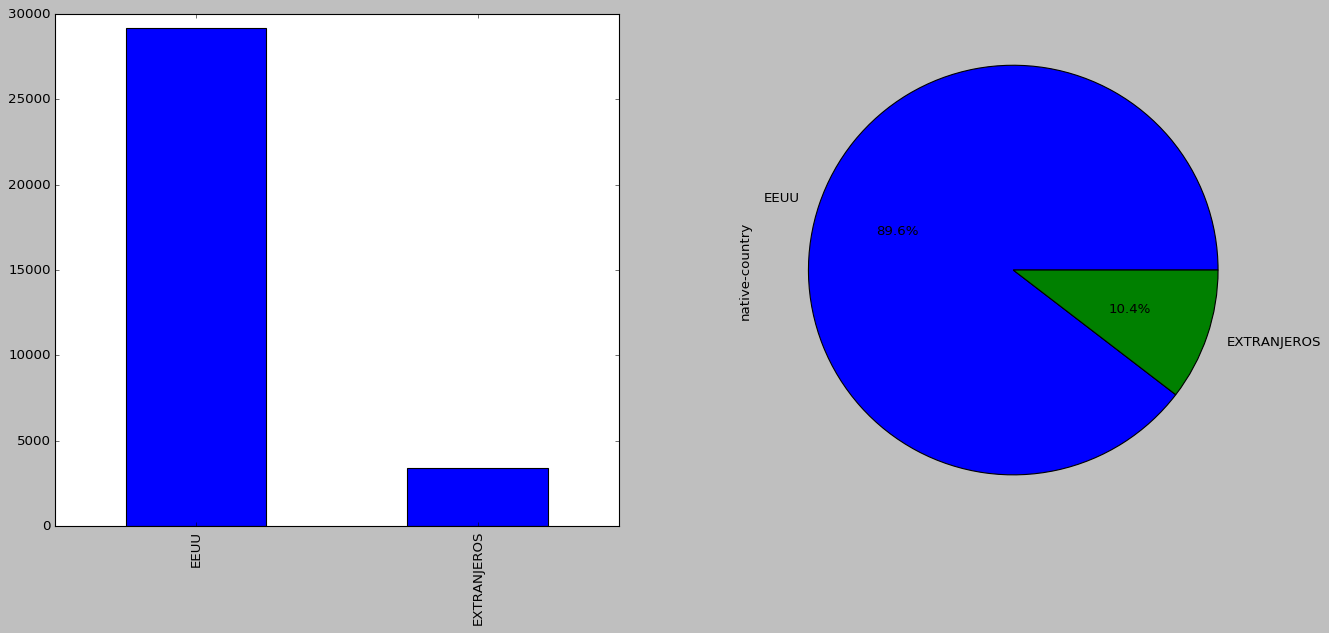

In [ ]:
df_bycountry = df['native-country'].apply(lambda row: "EEUU" if 'United-States' in row else "EXTRANJEROS")

fig, axes = plt.subplots(1,2, figsize=(20,8))
df_bycountry.value_counts().plot.bar(ax=axes[0])
df_bycountry.value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])

Podríamos agrupar en un montón de categorías, o incluso generar nuevas categorías en vez solo de extranjeros:
- paises que hablan inglés nativamente
- por continente
- ...

_________
¿Que podemos decir de los que ganan más de 50k, y de los que ganan menos con respecto a la educación?  
Podríamos visualizar un gráfico de barras dividiendo por categoría.

Text(0.5, 1.0, '>50K')

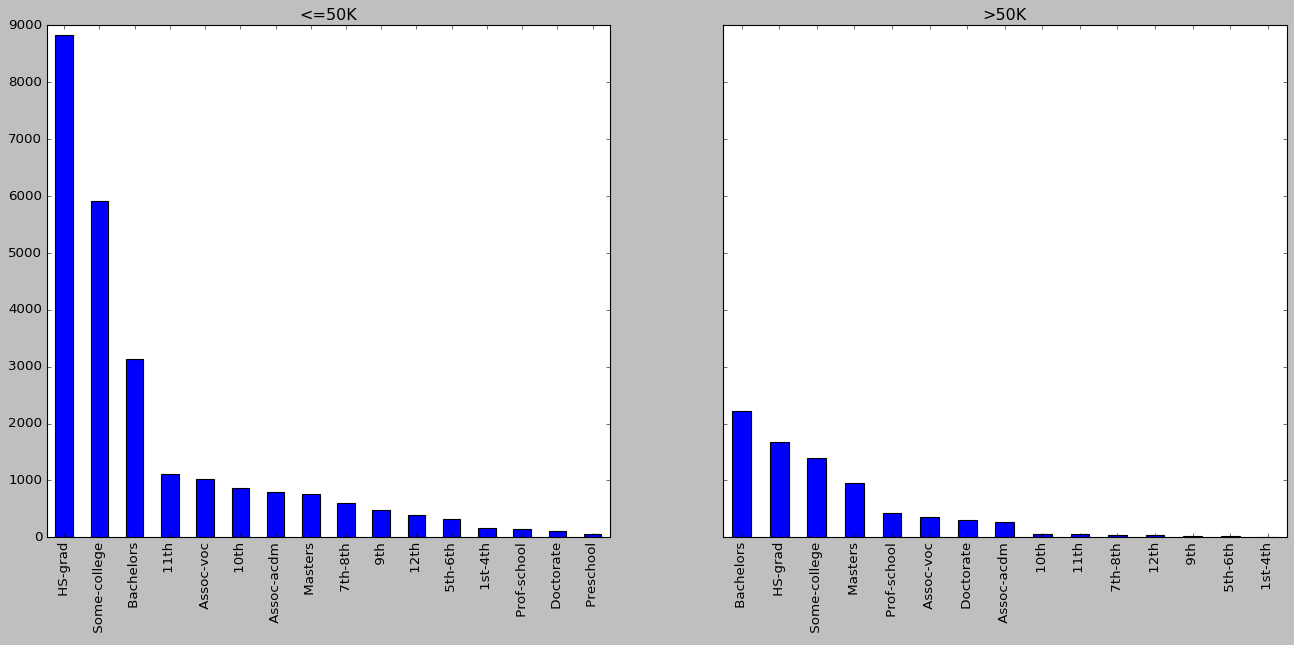

In [ ]:
# una gráfica más sencilla
fig, axes = plt.subplots(1,2, figsize=(20,8), sharey=True)

df.loc[df.income.str.contains('<=50K')].education.value_counts().plot.bar(ax=axes[0])
axes[0].set_title('<=50K')

df.loc[df.income.str.contains('>50K')].education.value_counts().plot.bar(ax=axes[1])
axes[1].set_title('>50K')

Nuevamente, este gráfico es muy dificil de leer porque tenemos muchas categorías y además, en 2 gráficos separados. Podríamos realizar un diagrama de barras apilado por categoría y es mucho más facil de entender y analizar:

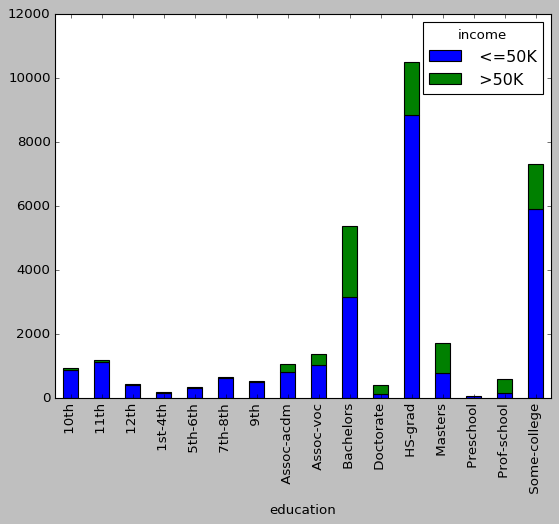

In [ ]:
# EN un mismo gráfico se ve mejor
(
    df.groupby('income').education
    .value_counts()
    .sort_values(ascending=False)
    .unstack(level=0)
    .plot.bar(stacked=True)
)

Podríamos preguntarnos: ¿nuestro dataset tiene esa distribución por algo en particular?

Por ejemplo:
- ¿podríamos decir que en el mercado laboral hay 33% de mujeres?
- ¿podríamos decir que en el mercado la mayoría SIEMPRE gana menos de 50K?

Hay preguntas que no se pueden responder con respecto a toda la población en general, sino de nuestro dataset. Esto más bien es un problema de estadística.


### 1.1.3 Variables númericas
- Vamos a visualizar la distribución de las variables númericas. Identificamos las discretas y continuas.

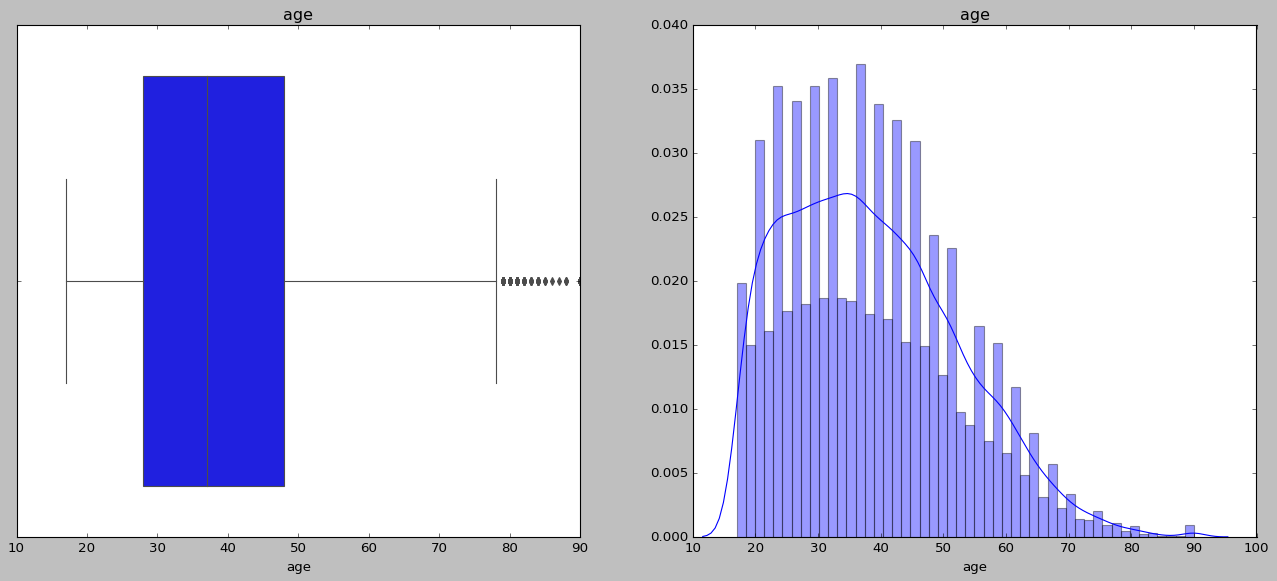

<Figure size 640x480 with 0 Axes>

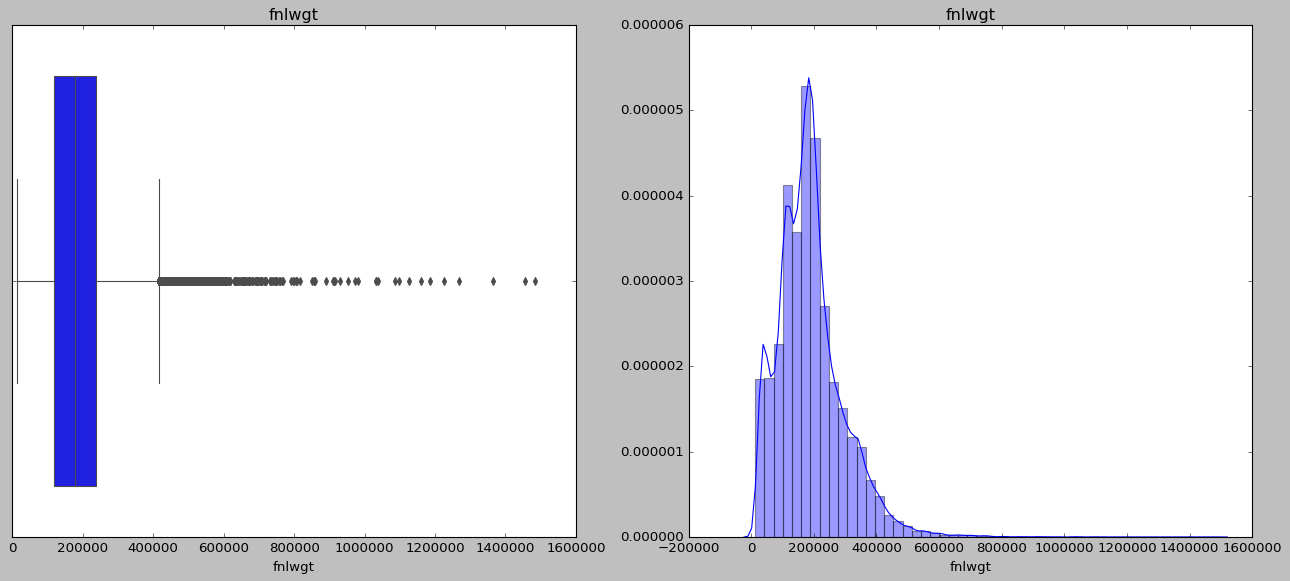

<Figure size 640x480 with 0 Axes>

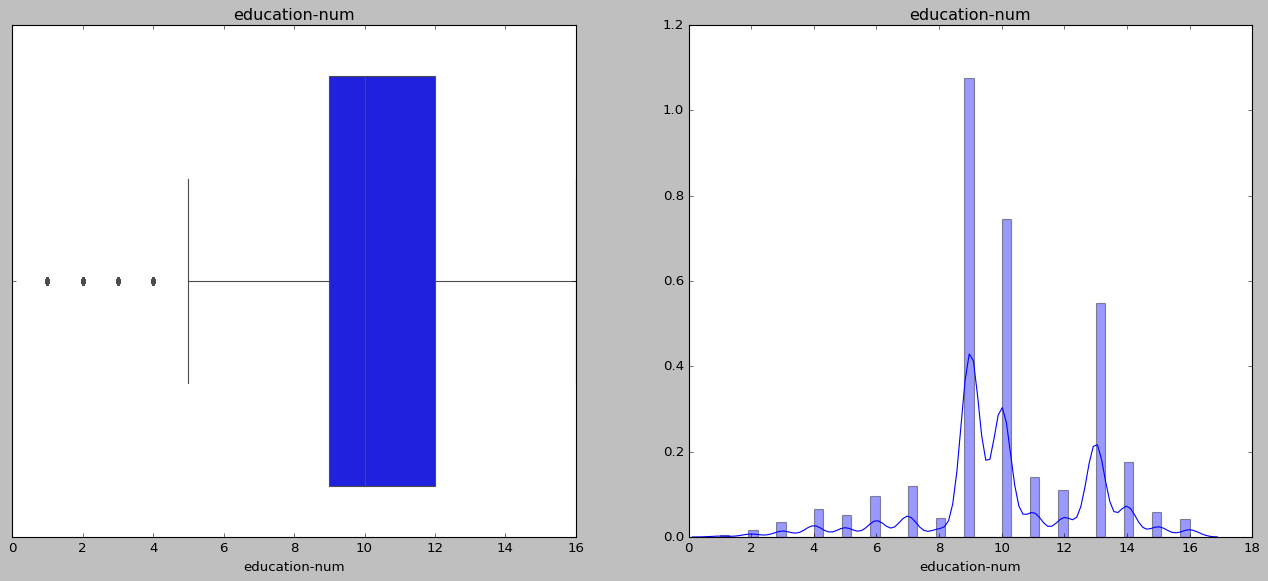

<Figure size 640x480 with 0 Axes>

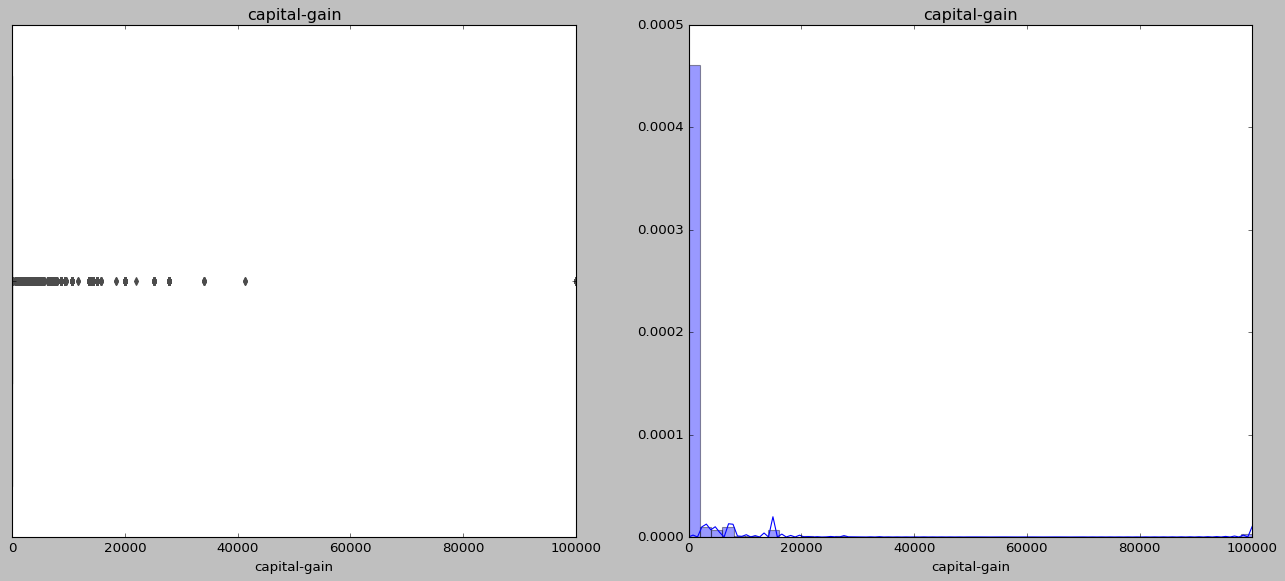

<Figure size 640x480 with 0 Axes>

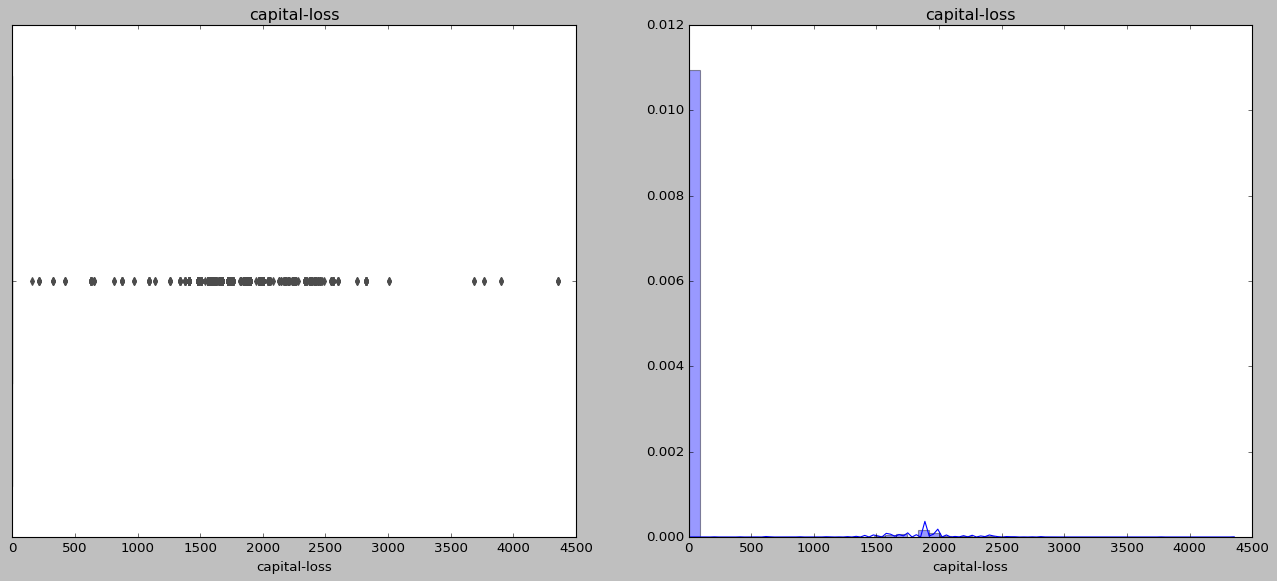

<Figure size 640x480 with 0 Axes>

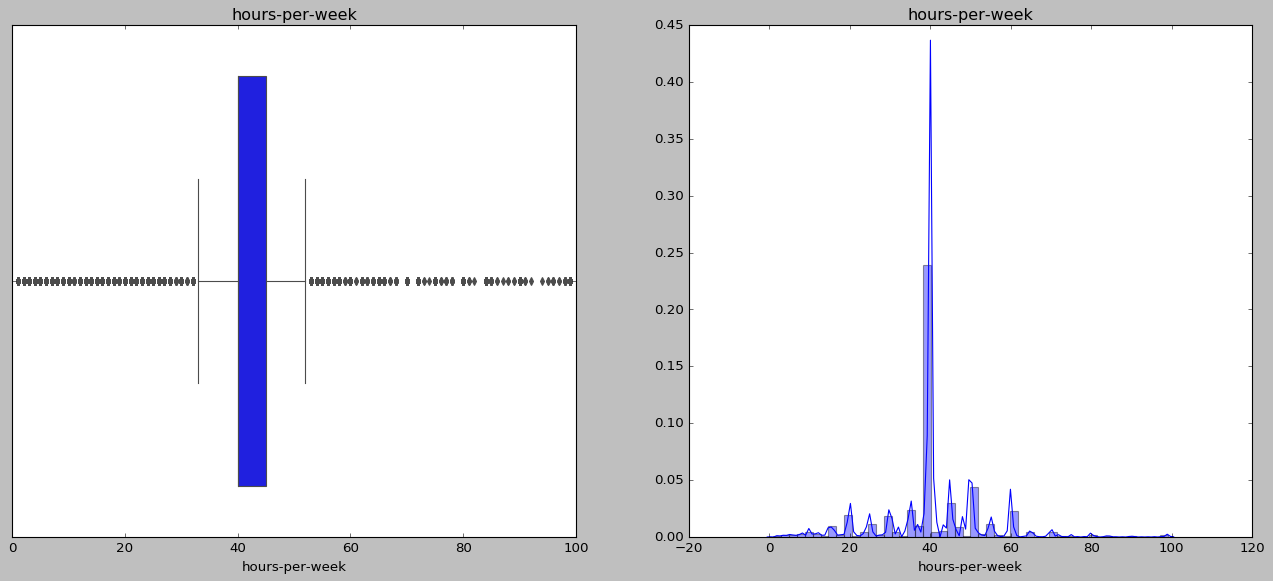

<Figure size 640x480 with 0 Axes>

In [ ]:
df_numeric = df.select_dtypes(np.number)

for c in df_numeric.columns:
    fig, axes = plt.subplots(1,2, figsize=(20,8))
    sns.boxplot(df_numeric[c], ax=axes[0])
    axes[0].set_title(c)
    sns.distplot(df_numeric[c], ax=axes[1])
    axes[1].set_title(c)
    plt.figure()

Otra manera de realizar la visualización de nuestras variables númericas (analisis univariante)

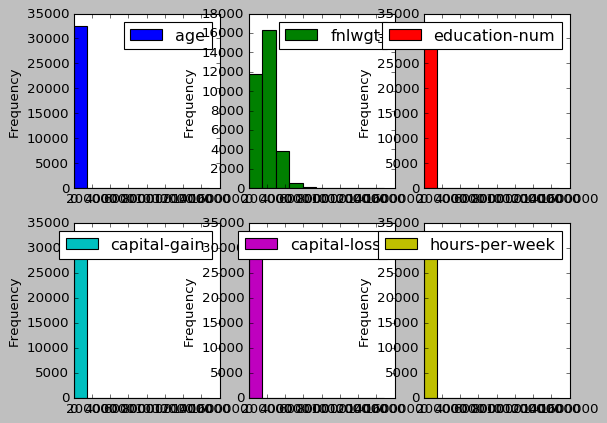

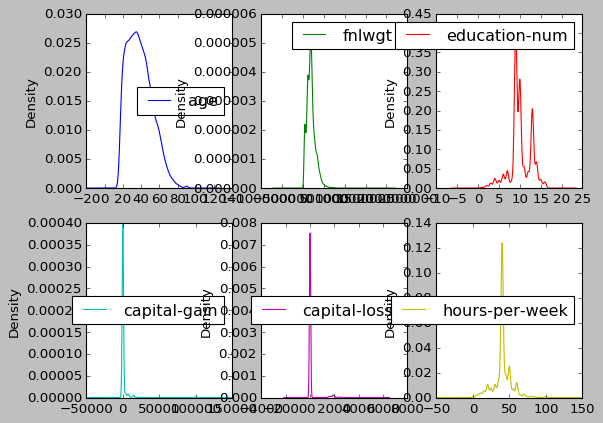

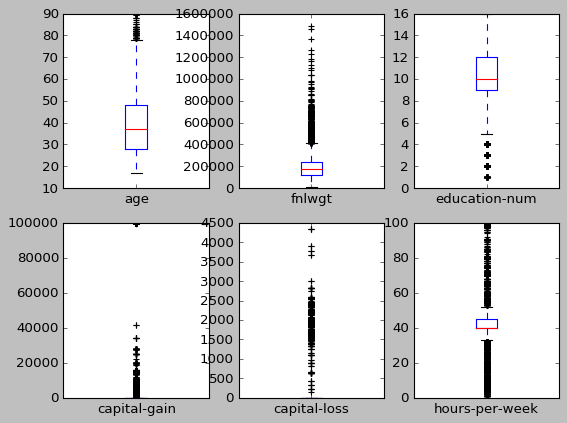

In [ ]:
_ = df_numeric.plot(kind='hist',subplots=True, layout=(2,3),sharex=False, sharey=False)
_ = df_numeric.plot(kind='density',subplots=True, layout=(2,3),sharex=False, sharey=False)
_ = df_numeric.plot(kind='box',subplots=True, layout=(2,3),sharex=False, sharey=False)

### Resumen
- Variables que tienen datos al parecer incompletos o "raros": capital-gain, capital-loss
- Variables que descartaría: capital-gain, capital-loss. La mayoría de sus valores son 0 (incompletos seguramente)

- Variables con muchos outliers: hours-per-week. (no quiere decir que estén mal...)

- Variables númericas discretas: education-num (relacionado con education!)  
Podríamos verificar si se corresponden con esa variable...

- Variables "interesantes": age, fnlwgt, education-num (?), hours-per-week



- La mayoria de las variables que no tienen distribución normal, pero se asemejan (con un poco de sesgo)

____

Podríamos visualizar violin plots para ver todos estos dos gráficos juntos!:
- en x podemos colocar una variable  (ejemplo sex)
- en y podemos colocar una variable númerica (ejemplo age)
- en hue podemos colocar una clase ( o categorica ) por ejemplo 'income'

<Figure size 640x480 with 0 Axes>

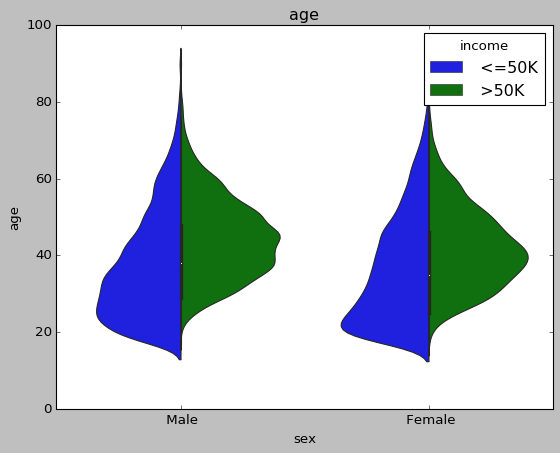

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.violinplot(x='sex', y='age', hue='income', data=df, split=True)
plt.title('age')
plt.figure()

En el gráfico vemos la distribución de la edad, dividida por income y sex. Cada income tiene su density-plot, luego dividimos por sex.

Como vemos, las mujeres que ganan menos de 50K en edades jovenes, tienen la misma distribución, pero en los hombres parece que es más ancho el grafico (desviación standard).
Podríamos pensar que:
- las mujeres a más temprana edad pasan a ganar más de 50K (na)
- o podría ocurrir que dejan de trabajar (por eso no hay datos...)
- o que justo estemos en una época en la que muchas jovenes empezaron a trabajar (y que aún no avanzó en el tiempo)
- ....

Vemos que la distribución de edades de los que más ganan dividido por sexo se distribuye semejantemente (media 40 años).

Como conclusión, `las gráficas lo son todo para comunicar`. Hay que pensar como mostrar los datos para poder entenderlos y comunicarlo a quien corresponda de la mejor manera.

Esta etapa es de las más importantes, ya que, si no sabemos a que nos enfrentamos nuestras predicciones no tendrán mucho sentido.

> **Necesitamos conocer nuestros datos**
_________


### 1.1.3 Anexos
Podríamos agrupar por ciertas categorías y visualizar estadísticas genéricas.

In [ ]:
# df.groupby('race').describe()

In [ ]:
# df.groupby('race').describe(include=np.object)

In [ ]:
# df.groupby('sex').describe()

In [ ]:
# df.groupby('sex').describe(include=np.object)


Podríamos buscar casos particulares en nuestros datos, por ejemplo:   
¿Máximas horas que una persona trabaja por semana? y quien es esa persona?

In [ ]:
df['hours-per-week'].max(), df['hours-per-week'].idxmax()

(99, 935)

In [ ]:
df.iloc[935]

age                                37
workclass                     Private
fnlwgt                         176900
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     99
native-country          United-States
income                           >50K
Name: 935, dtype: object

### fin analisis exploratorio
_____________________________

## 1.2.Transformación de datos
Como vimos en las diapositivas, tenemos muchas opciones para transformar nuestros datos.
Recordar que estos pasos deberían ser "repetibles" en caso que aparezcan más.


Nota: Las notebooks nos hacen abusar de estos pasos, ya que al codificar como si fuese una CLI, nos da versatilidad pero luego, tenemos un lindo spaguetti-code. En un futuro, deberíamos colocar lo necesario en un script, modularizado, para poder repetir los pasos.

Separamos el *dataframe* en dos, por un lado todos los atributos que vamos a usar para la clasificación y por otro la clase resultante.

In [ ]:
from sklearn import preprocessing

In [ ]:
# removemos education-num, 'capital-loss' y 'capital-gain' directamente aquí
X = df[[
    'age','workclass','fnlwgt',
    'education','marital-status',
    'occupation','relationship','race',
    'sex',
    'hours-per-week','native-country'
]]
y = df['income']

In [ ]:
# obtenemos las columnas númericas y categoricas
numeric_columns = np.array(X.select_dtypes(np.number).columns)
categorical_columns = np.array(X.select_dtypes(np.object).columns)

In [ ]:
# transformamos la categoría native-country en dos, para que sea más representativo
filter_by_not_eeuu=(~X['native-country'].str.contains('United-States'))
X.loc[filter_by_not_eeuu, ['native-country']] = "EXTRANJEROS"

In [ ]:
# de los datos categoricos, vamos a limpiar un poco. (strip y lowercase todo)
X[categorical_columns] = (
    X[categorical_columns]
    .apply(lambda df: df.str.lower(), axis=1)
    .apply(lambda df: df.str.strip(), axis=1)
)

In [ ]:
X[categorical_columns]

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,state-gov,bachelors,never-married,adm-clerical,not-in-family,white,male,united-states
1,self-emp-not-inc,bachelors,married-civ-spouse,exec-managerial,husband,white,male,united-states
2,private,hs-grad,divorced,handlers-cleaners,not-in-family,white,male,united-states
3,private,11th,married-civ-spouse,handlers-cleaners,husband,black,male,united-states
4,private,bachelors,married-civ-spouse,prof-specialty,wife,black,female,extranjeros
...,...,...,...,...,...,...,...,...
32556,private,assoc-acdm,married-civ-spouse,tech-support,wife,white,female,united-states
32557,private,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,united-states
32558,private,hs-grad,widowed,adm-clerical,unmarried,white,female,united-states
32559,private,hs-grad,never-married,adm-clerical,own-child,white,male,united-states


### 1.2.2 Transformación categóricos
Encoding de los otros atributos categoricos:
- one-hot
- label encoding

vamos a fitear varios encoders según la columna, y generar nuevos datos.

In [ ]:
encoders = {}

In [ ]:
for c in ['sex', 'race']:
    encoders[c] = preprocessing.OneHotEncoder(
        sparse=False,
        handle_unknown='ignore',
#         categories= X[c].unique()
    ).fit(X[[c]])

In [ ]:
# obtenemos las columnas categoricas que no son race ni sex
other_categorical_columns = categorical_columns[
    np.where(
        (categorical_columns != "sex")
        & (categorical_columns != "race")
        & (categorical_columns != "income")
    )
]

In [ ]:
for c in other_categorical_columns:
    X[c] = X[c].astype(str)
    le = preprocessing.LabelEncoder()
    le.fit(X[c])
    encoders[c] = le

### 1.2.3.Transformación de datos númericos:
Podemos realizar varias transformaciones.
- "Discretizar": transformar número en un nominal (KBinsDiscretizer)
- "Normalizar": podemos tipificar => (x' - media(x)) / std(x) (StandardScaler)

sklearn posee ambas transformaciones (y más), nosotros vamos a usar la 2da para los atributos númericos.

In [ ]:
for c in numeric_columns:
    encoders[c] = preprocessing.StandardScaler().fit(X[[c]])


In [ ]:
encoders

{'age': StandardScaler(copy=True, with_mean=True, with_std=True),
 'education': LabelEncoder(),
 'fnlwgt': StandardScaler(copy=True, with_mean=True, with_std=True),
 'hours-per-week': StandardScaler(copy=True, with_mean=True, with_std=True),
 'marital-status': LabelEncoder(),
 'native-country': LabelEncoder(),
 'occupation': LabelEncoder(),
 'race': OneHotEncoder(categorical_features=None, categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='ignore',
               n_values=None, sparse=False),
 'relationship': LabelEncoder(),
 'sex': OneHotEncoder(categorical_features=None, categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='ignore',
               n_values=None, sparse=False),
 'workclass': LabelEncoder()}

NOTA: el motivo por el cual almacenamos los encoders es importante. Supongamos que tenemos un dataset nunca antes visto, y tenemos categorías allí, que en nuestro dataset inicial no las teníamos.

Posterior a esto, tendríamos columnas/labels desconocidos. Al almacenar los encoders, podríamos reutilizarlo para volverle a colocar los mismos números que le colocamos inicialmente!.

**Es la manera que tenemos de hacer nuestros pasos reproducibles**

In [ ]:
# aplicams todos los encoders a nuestros datos

for col, encoder in encoders.items():
    if (encoder.__class__.__name__ == 'OneHotEncoder'):
        feature_names = list(map(lambda cat: col+"_"+cat, encoder.categories_[0]))
        nx = pd.DataFrame(encoder.transform(X[[col]]), columns=feature_names)
        X = pd.concat([X,nx], axis=1).drop(col, axis=1)
    else:
        X[[col]] = encoder.transform(X[[col]])


In [ ]:
# agregamos la columna y como target. Solo para persistirlo en el mismo archivo
X['target'] = y

Guardamos el dataset procesado en formato parquet (que pesa menos).  

In [ ]:
X.to_parquet('./data/adult/adult_processed.parquet')

__________________
Serializamos nuestro encoders, para poder utilizar luego

In [ ]:
import pickle
encoders_serialized = pickle.dumps(encoders)
# guardamos en un archivo

In [ ]:
# con esto lo guardamos en un archivo
with open('./data/adult/encoders.pickle', 'wb+') as f:
    pickle.dump(encoders, f, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# con esto lo leemos de un archivo
loaded_example = None
with open('./data/adult/encoders.pickle', 'rb') as f:
    loaded_example = pickle.load(f)

In [ ]:
# este paso solo es para verificar
print(loaded_example['sex'].transform([['female'], ['male']]))
print(loaded_example['race'].transform([['white']]))
# ... probar con los demás

[[1. 0.]
 [0. 1.]]
[[0. 0. 0. 0. 1.]]


# TOTALMENTE OPCIONAL: Binary classification (Adult Data Set)

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. Taken from
 [here](http://archive.ics.uci.edu/ml/datasets/Adult).

Attributes:  
**age:** continuous.  
**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
**fnlwgt:** continuous.  
**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
**education-num:** continuous.  
**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
**sex:** Female, Male.  
**capital-gain:** continuous.  
**capital-loss:** continuous.  
**hours-per-week:** continuous.  
**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
**salary**: >50K,<=50K

## 1. Read data

Importamos primero todas las bibliotecas necesarias:

In [ ]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Cargamos el archivo preprocesado en un *data frame*

In [ ]:
df = pd.read_parquet('data/adult/adult_processed.parquet')

Luego obtenemos un resumen del dataframe generado para ver su tamaño y tipos de datos:

Visualizamos rápidamente las primeras cinco filas para ver cómo se ve.

In [ ]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,hours-per-week,native-country,sex_female,sex_male,race_amer-indian-eskimo,race_asian-pac-islander,race_black,race_other,race_white,target
0,0.030671,7,-1.063611,9,4,1,1,-0.035429,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,<=50K
1,0.837109,6,-1.008707,9,2,4,0,-2.222153,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,<=50K
2,-0.042642,4,0.245079,11,0,6,1,-0.035429,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,<=50K
3,1.057047,4,0.425801,1,2,6,0,-0.035429,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,<=50K
4,-0.775768,4,1.408176,9,2,10,5,-0.035429,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,<=50K


## 2. Analisis exploratorio (sobre modificado)
Observamos primero un resumen estadístico de cada uno de los atributos mediante `describe`

In [ ]:
df.describe().T

Analizamos cómo se distribuyen las clases en el dataset

In [ ]:
df['target'].value_counts()

### 2.1 Correlación entre los atributos

In [ ]:
# scatter_matrix(df, figsize = (10, 7))
# plt.suptitle('Correlación de los atributos mediante scatter plots')
# plt.show()

In [ ]:
# plt.figure(figsize=(7,5))
# sns.heatmap(df.corr(),
#             xticklabels=df.corr().columns.values,
#             yticklabels=df.corr().columns.values,
#             cmap='BuPu')
# plt.title('Correlación de atributos mediante heatmap')
# plt.show()

En ambos gráficos se puede apreciar que la mayor correlación se da entre ...

## 3. Clasificación

### 3.1. Preparación del conjunto de entrenamiento

Separamos el *dataframe* en dos, por un lado todos los atributos que vamos a usar para la clasificación y por otro la clase resultante.

Vamos a realizar esto para *tunear* nuestro modelo y mejorarlo lo mejor posible.

In [ ]:
X = df.loc[:,~df.columns.isin(['target'])]
y = df[['target']]

y_encoder = LabelEncoder().fit(y)
y = y_encoder.transform(y)

In [ ]:
X.head(3)

Ahora separamos ambos dataframes en otros dos respectivamente. El 80% de los datos servirán para el entrenamiento de la predicción y el restante 20% será exclusivamente para la validación posterior.

In [ ]:
# Machine learning
import sklearn
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print('Tamaño original del dataframe: ', len(X))
print('Tamaño del dataframe de entrenamiento: ',len(X_train))
print('Tamaño del set de validación: ',len(y_test))

Nota: algo a tener en cuenta, es que nuestras muestras deberían ser representativas en train y test, es decir, que tengan la misma cantidad de ejemplos para ambas muestras; en este caso *income*

___
### 3.2. Clasificación con Árbol de decisión
Vamos a entrenar un arbol de decisión que clasificará a las personas si van a ganar más o menos de 50K según sus características.

- Entrenamos el modelo con X_train, y_train y evaluamos con X_test, y_test.
- La metrica que utilizamos es accuracy
- Luego vamos a buscar que parámetro se comporta mejor

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=7) # el número de la suerte
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

NOTA: Hay ciertos modelos en los que podemos ver la estructura, cuando avancemos en modelos más complejos eso no va a ser posible.
Estos modelos reciben el nombre de "caja blanca" y "caja negra".

Luego lo validamos con *X_test*, que es el conjunto de datos de validación que no es conocido por el algoritmo entrenado.

In [ ]:
y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)

In [ ]:
y_pred, y_train

(array([1, 0, 1, ..., 0, 0, 1]), array([0, 0, 0, ..., 0, 0, 0]))

Esto nos generó un arreglo con las clase que predijo para cada línea del conjunto de datos *X_test*:

La predicción se puede evaluar mediante la métrica **accuracy** ( o precisión )

In [ ]:
accuracy_score(y_test, y_pred)

0.7851988331030247

In [ ]:
# podemos medirla con otra métrica
roc_auc_score(y_test, y_scores[:,1])

0.8184668266996737

Todos los modelos tienen "hiperparámetros" con los que podemos mejorar nuestro entrenamiento.
Por ejemplo, los DecisionTreeClassifier's tienen max_depth.
Lo que vamos a hacer es lo siguiente:
- vamos a entrenar los arboles con N en max_depth
- vamos a evaluarlo con nuestro dataset de validación

Nos quedaremos con el que tiene mejor performance.

In [ ]:
models = []
for max_depth in range(3,10):
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=7)
    clf.fit(X_train, y_train)
    models.append(clf)

In [ ]:
metrics = []
for m in models:
    y_pred = m.predict(X_test)
    y_scores = m.predict_proba(X_test)
    metrics.append([
        m.get_depth(),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_scores[:,1])
    ])

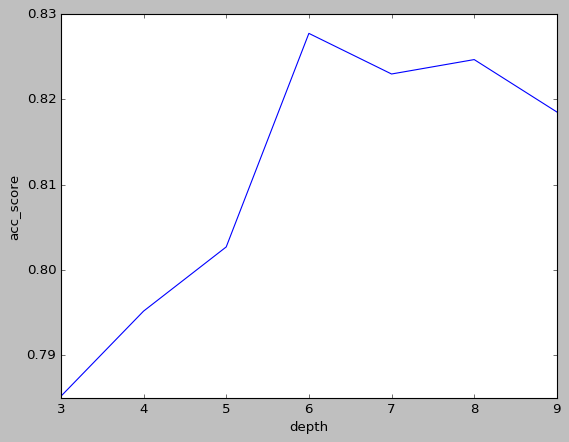

In [ ]:
sns.lineplot(
    x='depth',
    y='acc_score',
    data=pd.DataFrame(metrics, columns=['depth', 'acc_score', "roc_score"])
)

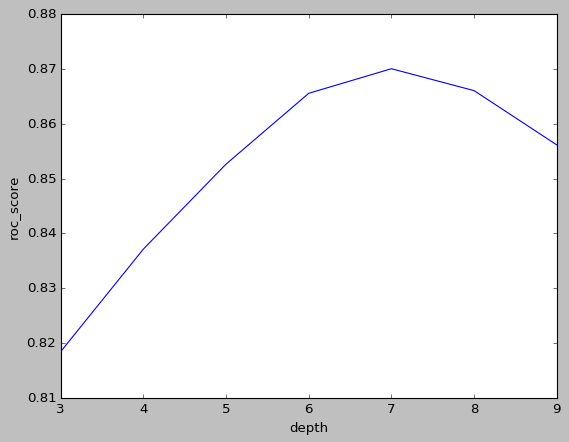

In [ ]:
sns.lineplot(
    x='depth',
    y='roc_score',
    data=pd.DataFrame(metrics, columns=['depth', 'acc_score', "roc_score"])
)

Como podemos ver:
- la mejor 'accuracy' la tuvimos con max_depth 7.
- la mejor 'roc' la tuvimos con max_depth 7.

Este es el hiperparámetro que vamos a utilizar en el dataset "nunca antes visto".
Primero entrenamos nuestro modelo con todo el dataset:

In [ ]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X,y)
accuracy_score(y, tree.predict(X)) # error general del modelo (ni bias ni variance)

0.8300113632873684

## 4. Test (o Producción...)
Normalmente, nosotros vamos a probar nuestro algoritmo en un dataset nunca antes visto.
Para ello, importamos los datos del set de test (`adult.test`) para poner a prueba nuestro algoritmo.

In [ ]:
import utils as utils
import pickle

In [ ]:
test = pd.read_csv('data/adult/adult.test', header=None,
                 names=['age','workclass','fnlwgt', \
                        'education','education-num','marital-status', \
                        'occupation','relationship','race', \
                        'sex','capital-gain','capital-loss', \
                        'hours-per-week','native-country','income'
                       ])

In [ ]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [ ]:
# obsevamos que income tiene datos inválidos
test['income'] = test['income'].str.replace('.','')

In [ ]:
test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K


In [ ]:
# removemos las filas que tienen valores NAN
test = test.dropna(axis=0)

In [ ]:
test.head(5)

### 4.1 Separamos el income del resto de los datos
Separamos los datos para la predicción de la clase

In [ ]:
test_atributos, test_income = utils.select_features(test)

### 4.2 Preparamos los datos de modo que tengan el mismo formato que el set de datos de entrenamiento
Guardamos las funciones que podemos repetir en "utils.py"

In [ ]:
# obtenemos las columnas númericas y categoricas
numeric_columns = np.array(test_atributos.select_dtypes(np.number).columns)
categorical_columns = np.array(test_atributos.select_dtypes(np.object).columns)

In [ ]:
test_atributos = utils.transform_cols_astype_str(test_atributos, categorical_columns)

In [ ]:
test_atributos = utils.transform_native_country(test_atributos)

In [ ]:
test_atributos[categorical_columns] = (
    utils.strip_and_lower_categoricals(test_atributos, categorical_columns)
)

In [ ]:
test_income = y_encoder.transform(test_income)

In [ ]:
# cargamos los encoders
encoders = None
with open('./data/adult/encoders.pickle', 'rb') as f:
    encoders = pickle.load(f)

Nótese que aquí los `transformers`ya conoce los datos, de modo que ejecutamos **transform en vez de fit_transform** en la función `transform_with_encoders`.

In [ ]:
test_atributos = utils.transform_with_encoders(test_atributos, encoders)

In [ ]:
test_atributos.head().T

,1,2,3,4,5
age,-0.995706,-0.042642,-0.775768,0.397233,-1.508894
workclass,4.000000,4.000000,2.000000,4.000000,0.000000
fnlwgt,0.350774,-0.947095,1.394362,-0.279070,-0.817458
education,1.000000,11.000000,7.000000,15.000000,15.000000
marital-status,4.000000,2.000000,2.000000,2.000000,4.000000
occupation,7.000000,5.000000,11.000000,7.000000,0.000000
relationship,3.000000,0.000000,0.000000,0.000000,3.000000
hours-per-week,-0.035429,0.774468,-0.035429,-0.035429,-0.845327
native-country,1.000000,1.000000,1.000000,1.000000,1.000000
sex_female,0.000000,0.000000,0.000000,0.000000,1.000000


### 4.3 Hacer predicciones y comparar

In [ ]:
pred_test = tree.predict(test_atributos)

In [ ]:
pred_test

array([0, 0, 0, ..., 1, 0, 1])

Comparamos lo que predijo el modelo para nuestro set de test vs los datos income que habíamos separado

In [ ]:
accuracy_score(test_income, pred_test)

0.827590442847491

### Anexo: feature importance


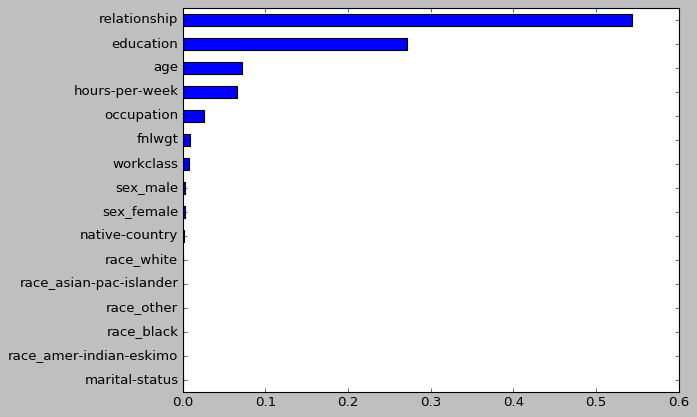

In [ ]:
pd.Series(tree.feature_importances_, index=X.columns).sort_values().plot.barh()

Estamos observando que hay features que directamente no las está utilizando para realizar la predicción, y esto nos ocasiona "demoras" en el entrenamiento (pensar en muchas muchas features).

Aquí se pueden utilizar modelos para reducir la dimensionalidad (y no perder información), o simplemente quitar esas features y empezar a testear la métrica.

También podemos ver que quizás, no son las características que nos gustaría que el modelo tome para realizar la predicción.

___________________________________________
## 5.Mejorando nuestras predicciones:
### 5.1.Ensembles & Parameter Tuning
Vamos a utilizar la técnica de GridSearch para encontrar los mejores parámetros.
Vamos a utilizar modelos más robustos que se suelen utilizar en las competencias:
- xgboost
- lightgbm
- random forest
- y nuestro decision tree de más arriba.

*Luego comparar con las redes neuronales!*

GridSearch lo que hace es entrenar (por fuerza bruta) un modelo con todos los parámetros posibles.
No es algo dificil de hacer (lo hicimos más arriba...), pero ayuda un poco a darle "forma" al estilo interfaz genérica.

Se suelen tomar 2 caminos:
- Tomar los mejores parámetros y volver a entrenar un nuevo modelo.
- Cuando hay muchos datos, se suele tomar el promedio de las probabilidades de cada modelo.

Nosotros vamos a tomar el primer camino.
Como veremos, es una tarea que puede realizarse en una función y parametrizar:
- hiperparametros (grid) de constructor y de fit
    - hay modelos como xgboost y lightgbm que tienen parámetros en el fit
    - normalmente, en sklearn eso no sucede, intentan ser "compliance" con esas interfaces pero "hasta ahí"
- datasets (x,y)
- modelo

Luego grid-search nos retorna los mejores parámetros para una determinada métrica:

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [500, 1000],
}

clf = GridSearchCV(
    XGBClassifier(),
    parameters,
    n_jobs=2,
    return_train_score=True,
    cv=3
)

clf.fit(
    X=X_train,
    y=y_train,
    eval_metric='auc',
    verbose=False,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=5
)

xgb_model = clf.best_estimator_

print("Mejor Auc: {}".format(clf.best_score_))
print("Mejores hiperparametros: {}".format(clf.best_params_))

# con los mejores parámetros vuelvo a entrenar el modelo
xgb_model = XGBClassifier(**clf.best_params_)
xgb_model.fit(
    X=X_train,
    y=y_train,
    eval_metric='auc',
    verbose=False,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=5
)

Mejor Auc: 0.840793918918919
Mejores hiperparametros: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
accuracy_score(y_test, xgb_model.predict(X_test))

0.8377091969906341

In [ ]:
from lightgbm  import LGBMClassifier

param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [500, 1000]
}

clf = GridSearchCV(LGBMClassifier(), param_grid, cv=3)

clf.fit(
    X_train, y_train,
    eval_metric='auc',
    verbose=False,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10
)

print("Mejor Auc: {}".format(clf.best_score_))
print("Mejores hiperparametros: {}".format(clf.best_params_))

# con los mejores parámetros vuelvo a entrenar el modelo
lgb_model = LGBMClassifier(**clf.best_params_)

lgb_model.fit(
    X=X_train,
    y=y_train,
    eval_metric='auc',
    verbose=False,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10
)

Mejor Auc: 0.8420224201474201
Mejores hiperparametros: {'learning_rate': 0.05, 'n_estimators': 500}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
accuracy_score(y_test, lgb_model.predict(X_test))

0.8398587440503608

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from lightgbm  import LGBMClassifier

param_grid = {
    'max_depth': [3,4,6],
    'n_estimators': [500, 1000]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)

clf.fit(X_train, y_train)

print("Mejor Auc: {}".format(clf.best_score_))
print("Mejores hiperparametros: {}".format(clf.best_params_))

rf_clf = RandomForestClassifier(**clf.best_params_)

rf_clf.fit(X_train, y_train)

Mejor Auc: 0.8233645577395577
Mejores hiperparametros: {'max_depth': 6, 'n_estimators': 1000}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
for model in [rf_clf, lgb_model, xgb_model, tree]:
    print(100*"=")
    print(model.__class__.__name__)
    print(sklearn.metrics.classification_report(y_test, model.predict(X_test)))


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4952
           1       0.67      0.48      0.56      1561

    accuracy                           0.82      6513
   macro avg       0.76      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513

LGBMClassifier
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4952
           1       0.70      0.57      0.63      1561

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513

XGBClassifier
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4952
           1       0.70      0.57      0.63      1561

    accuracy                           0.84      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.8

**LGBM tuvo la mejor performance!**
* y las redes? *

### 5.3.Classification con Neuronal Networks (Adult Data Set)

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. Taken from
 [here](http://archive.ics.uci.edu/ml/datasets/Adult).


Para que funcionen estos ejemplos:
instalar keras y tensorflow

In [ ]:
# !pip install keras tensorflow

## 1. Read data

Importamos primero todas las bibliotecas necesarias:

In [120]:
# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn import preprocessing

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [127]:
from importlib import import_module
import imp

In [133]:
# import_module('utils')
file_pointer, file_path, description  = imp.find_module('utils')
utils = imp.load_module('utils', file_pointer, file_path, description)

In [135]:
utils.calculate_class_weight

<function utils.calculate_class_weight(y)>

Cargamos el archivo preprocesado en un *data frame*

In [ ]:
df = pd.read_parquet('data/adult/adult_processed.parquet')

Luego obtenemos un resumen del dataframe generado para ver su tamaño y tipos de datos:

Visualizamos rápidamente las primeras cinco filas para ver cómo se ve.

In [ ]:
df.head()

## 2. Analisis exploratorio (sobre modificado)
Observamos primero un resumen estadístico de cada uno de los atributos mediante `describe`

In [ ]:
df.describe().T

Analizamos cómo se distribuyen las clases en el dataset

In [ ]:
df['target'].value_counts()

## 3. Clasificación

### 3.1. Preparación del conjunto de entrenamiento

Separamos el *dataframe* en dos, por un lado todos los atributos que vamos a usar para la clasificación y por otro la clase resultante.

In [ ]:
X = df.loc[:,~df.columns.isin(['target'])]
y = df[['target']]

Vamos a escalar los datos de X, ya que las redes tardan menos en entrenarse con datos normalizados.

*NOTA: tener en cuenta que hicimos varios hot-encodings. Seguramente eso podríamos quitarlo*

In [ ]:
# X = preprocessing.StandardScaler().fit_transform(X)
# esto suele ser obligatorio casi siempre, en este caso obtenemos mejores resultados si no lo hacemos

In [ ]:
print(np.unique(y))

En las redes neuronales, las entradas y salidas son siempre númericas. Por ende, tendremos que transformar un poco nuestra columna "target" del dataset.

Como podemos ver arriba, tenemos valores "<=50K" y ">50K".
Vamos a utilizar un label_encoder para esta tarea:


In [ ]:
target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)

In [ ]:
# vemos que 0 es <=50K y 1 es  >50K
pd.Series(y).value_counts()

In [ ]:
# Machine learning
import sklearn
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

import tensorflow as tf
import keras

Ahora separamos ambos dataframes en otros dos respectivamente.

El 80% de los datos servirán para el entrenamiento de la predicción y el restante 20% será exclusivamente para la validación posterior.

In [ ]:
d_in = X.shape[1]
d_out = np.unique(y).size
classes = d_out

# si vas a usar convolución, hay que aplicar esto
# X = X.values.reshape(-1, d_in, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [ ]:
print(50*"=")
print('Tamaño original del dataframe: ', len(X))
print('Tamaño del dataframe de entrenamiento: ',len(y_train))
print('Tamaño del set de validación: ',len(y_val))
print('Tamaño del set de testeo: ',len(y_test))
print('Tamaño de la entrada de la red: ', d_in)
print('Tamaño de la salida de la red: ', d_out)
print('Peso de las clases: ', utils.calculate_class_weight(np.append(y_train, y_val)))
print(50*"=")

Nota: algo a tener en cuenta, es que nuestras muestras deberían ser representativas en train y test, es decir, que tengan la misma cantidad de ejemplos para ambas muestras; en este caso lo realizamos con el parámetro "stratify".

___
### 3.2. Clasificación con Red Neuronal
Vamos a entrenar una RN que clasificará a las personas si van a ganar más o menos de 50K según sus características.

- Entrenamos el modelo con X_train, y_train y evaluamos con X_test, y_test.
    - el propio modelo tiene una forma de ir evaluando esto por cada "epoca"
- La metrica que utilizamos es accuracy
- La medida de error es "entropía cruzada".

Vamos a ir realizando pruebas de arquitectura para ver como se comporta la red:

In [ ]:
# NOTA:
# Buen resultado lo obtuve con in -> 20 -> 10 -> out
# patience=30,
# { 0: 0.6, 1: 0.4 }

# creamos un arreglo de capas. Cada capa puede tener N neuronas y cualquier función de activación
layers = []

# Capa de entrada. esta es la primer capa, hay que agregar el input_shape.
layer1 = keras.layers.Dense(200, input_shape=(d_in,), activation='relu')

# la agregamos al arreglo
layers.append(layer1)

# Capa HIDDEn.
layer2 = keras.layers.Dense(1000, activation='relu')

# # la agregamos al arreglo
layers.append(layer2)


# la ultima capa si o si tiene que tener tantas salidas como clases,
# tiene que tener activación softmax , esto nos devuelve las probabilidades por clase (aka predict_proba)
output = keras.layers.Dense(classes, activation='softmax')

# agregamos la última capa (logit)
layers.append(output)

# Creamos un modelo.
model = keras.Sequential()

#agregamos las capas al modelo.
for l in layers:
    model.add(l)

# los modelos de redes neuronales trabajan con el gradiente para ajustar los parámetros
# Podemos definir ciertas entradas que son hiperparámetros
# probar poner valores muy chicos y valores grandes ej: 0.1, 0.01, 0.005
alpha = 0.001 # el "paso" o "step" dentro del calculo del gradiente

epochs = 1500 # cuantas veces debemos entrenar. (podríamos deternenos antes)

model.compile(
#     optimizer= keras.optimizers.SGD(lr=alpha), # descenso de gradiente
    optimizer='adam', # este optimizador es mejor que SGD
    loss='sparse_categorical_crossentropy', # error para ir calculando en cada iteracion (entropia cruzada)
    metrics=[
      'accuracy', # agregamos el accuracy del modelo
    ],
)

model.summary()

En el paso anterior, declaramos la arquitectura, y compilamos nuestro modelo. Aún falta entrenarlo!
Podemos visualizar la arquitectura y la cantidad de parámetros (recordar diferencia con hiperparámetros) que la red posee entre capa y capa.

Podríamos intentar utilizar directamente nuestro modelo:

In [ ]:
y_pred = model.predict_classes(X_test)
utils.print_report(y_test, y_pred)

vamos a entrenar nuestra red:
- tenemos callbacks en los que podemos "engancharnos". Uno de ellos es EarlyStopping. Inicialmente no vamos a verlo, para verificar el overfitting.
- El propio modelo tiene un parametro de "validation_data". Esto sirve para verificar en cada paso (antes de actualizar por gradiente) cual fue el valor de métrica seleccionada (en este caso accuracy y entropía cruzada)
- Posterior al entrenamiento, el modelo nos va a retornar el "history" que posee por cada iteración el calculo de todas las metricas en el dataset de train y el de validación.


In [ ]:
# luego descomentar esto
callbacks = [
# https://stackoverflow.com/questions/43906048/keras-early-stopping
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# Early stopping callback is called on every epoch end, compares the best monitored value with the current one and stops if conditions are met
   keras.callbacks.EarlyStopping(
       monitor='val_loss',  # queremos verificar que la entropia cruzada en dataset de validación no cambie
       patience=10, # vamos a esperar 50 iteraciones sin cambios
       verbose=0,
       mode='auto',
       restore_best_weights=True
   )
]

# este es otro hiperparámetro. Es la importancia de cada clase.
# por default, le podemos poner la distribución real (calculada más arriba)
# pero podemos ir "ajustando" para obtener una mejor predicción
weight = { 0: 0.6, 1: 0.4 }

# Entrenamiento del modelo
history = model.fit(
    X_train[:15000],  # son 20.000 pero elegimos los primeros 5000 para que no tarde tanto
    y_train[:15000],
    epochs=epochs,
    batch_size=32,
    verbose=2, # si ponemos verbose 2 podemos ver como va entrenando el modelo
    callbacks = callbacks, # luego descomentar esto
    validation_data = (X_val, y_val),
    class_weight= weight
)

Luego lo validamos con *X_test*, que es el conjunto de datos de validación que no es conocido por el algoritmo entrenado.

In [ ]:
# imprimimos lo que fue aprendiendo el modelo en cada iteración.
utils.print_learning_curve(model, history)

## 4. Test (o Producción...)
Normalmente, nosotros vamos a probar nuestro algoritmo en un dataset nunca antes visto.

En nuestro caso, separamos (más arriba) un dataset de "testeo".

In [ ]:
# esto datos son los que nunca vio el modelo!
y_pred = model.predict_classes(X_test)
utils.print_report(y_test, y_pred)